# Compare BetaVAE models

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from specvae import utils

In [2]:
def load_experiment_from_path(filepath):
    return pd.read_csv(filepath, index_col=0)

def load_experiment(dataset, experiment_name, filename='experiment.csv', base_path=None):
    if base_path is None:
        filepath = utils.get_project_path() / '.model' / dataset / experiment_name / filename
    else:
        filepath = base_path / dataset / experiment_name / filename
    return load_experiment_from_path(filepath)

def load_experiment_sessions(dataset, experiment_name, filenames=['experiment.csv'], base_path=None):
    dfs = [load_experiment(dataset, experiment_name, filename, base_path) for filename in filenames]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [3]:
indices = [0, 1, 2]
df = load_experiment_sessions('MoNA', 'jointvae_capacity_nextron', 
    ['experiment01_dms.csv', 'experiment02_dms.csv', 'experiment03_dms.csv', 
     'experiment04_dms.csv', 'experiment05_dms.csv', 'experiment06_dms.csv',
     'experiment07_dms.csv', 'experiment08_dms.csv', 'experiment09_dms.csv'])
# df2 = load_experiment_sessions('HMDB', 'betavae_capacity_nextron', 
#     ['experiment01.csv', 'experiment02.csv', 'experiment03.csv', 'experiment04.csv', 
#      'experiment05.csv', 'experiment06.csv'])
# df = pd.concat([df1, df2], ignore_index=True)
df.to_csv(utils.get_project_path() / '.model' / 'jointvae_mona.csv')
df

name dataset  \
0     jointvae_capacity    MoNA   
1     jointvae_capacity    MoNA   
2     jointvae_capacity    MoNA   
3     jointvae_capacity    MoNA   
4     jointvae_capacity    MoNA   
...                 ...     ...   
1210  jointvae_capacity    MoNA   
1211  jointvae_capacity    MoNA   
1212  jointvae_capacity    MoNA   
1213  jointvae_capacity    MoNA   
1214  jointvae_capacity    MoNA   

                                        full_model_name  \
0     jointvae_capacity_100-100-3-100-100_01 (25-12-...   
1     jointvae_capacity_100-100-3-100-100_01 (25-12-...   
2     jointvae_capacity_100-100-3-100-100_01 (25-12-...   
3     jointvae_capacity_100-100-3-100-100_01 (25-12-...   
4     jointvae_capacity_100-100-3-100-100_01 (25-12-...   
...                                                 ...   
1210  jointvae_capacity_100-100-90-50-3-50-90-100-10...   
1211  jointvae_capacity_100-100-90-50-3-50-90-100-10...   
1212  jointvae_capacity_100-100-90-50-3-50-90-100-10...   
1213  jointvae_capacity_100-100-90-50-3-50-90-100-10...   
1214  jointvae_capacity_100-100-90-50-3-50-90-100-10...   

                                        layer_config  \
0                     [[100, 100, 3], [3, 100, 100]]   
1                     [[100, 100, 3], [3, 100, 100]]   
2                     [[100, 100, 3], [3, 100, 100]]   
3                     [[100, 100, 3], [3, 100, 100]]   
4                     [[100, 100, 3], [3, 100, 100]]   
...                                              ...   
1210  [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1211  [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1212  [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1213  [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1214  [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   

                      latent_spec input_columns  param_temperature  \
0     {'cont': 1, 'disc': [2, 6]}  ['spectrum']               0.67   
1     {'cont': 1, 'disc': [2, 6]}  ['spectrum']               0.67   
2     {'cont': 1, 'disc': [2, 6]}  ['spectrum']               0.67   
3     {'cont': 1, 'disc': [2, 6]}  ['spectrum']               0.67   
4     {'cont': 1, 'disc': [2, 6]}  ['spectrum']               0.67   
...                           ...           ...                ...   
1210  {'cont': 1, 'disc': [2, 6]}  ['spectrum']               0.67   
1211  {'cont': 1, 'disc': [2, 6]}  ['spectrum']               0.67   
1212  {'cont': 1, 'disc': [2, 6]}  ['spectrum']               0.67   
1213  {'cont': 1, 'disc': [2, 6]}  ['spectrum']               0.67   
1214  {'cont': 1, 'disc': [2, 6]}  ['spectrum']               0.67   

      param_limit  param_dropout  param_cont_min_capacity  ...  \
0             1.0            0.0                      0.0  ...   
1             1.0            0.0                      0.0  ...   
2             1.0            0.0                      0.0  ...   
3             1.0            0.0                      0.0  ...   
4             1.0            0.0                      0.0  ...   
...           ...            ...                      ...  ...   
1210          1.0            0.0                      0.0  ...   
1211          1.0            0.0                      0.0  ...   
1212          1.0            0.0                      0.0  ...   
1213          1.0            0.0                      0.0  ...   
1214          1.0            0.0                      0.0  ...   

      m_test_avg_cos_sim  m_test_avg_eu_dist  m_test_avg_per_chag  \
0               0.902587            0.423512        120068.195312   
1               0.902587            0.423512        120068.195312   
2               0.902587            0.423512        120068.195312   
3               0.902587            0.423512        120068.195312   
4               0.902587            0.423512        120068.195312   
...                  ...                 ...                  ...   
1210            0.902587            0.423512        120068.195312   
1211            0.902587      

In [50]:
columns = list(df.columns)
params = list(filter(lambda x: x.startswith('param_'), columns))
values = list(filter(lambda x: x.startswith('m_'), columns))
others = list(filter(lambda x: not x.startswith('m_') and not x.startswith('param_'), columns))
# Separate by split:
train_values = list(filter(lambda x: x.startswith('m_train_'), columns))
valid_values = list(filter(lambda x: x.startswith('m_valid_'), columns))
test_values = list(filter(lambda x: x.startswith('m_test_'), columns))

In [51]:
import ast
def is_symmetric(row):
    layer_config = ast.literal_eval(row['layer_config'])
    return len(layer_config[0]) == len(layer_config[1])

def depth(row):
    layer_config = ast.literal_eval(row['layer_config'])
    lencoder, ldecoder = len(layer_config[0]) - 2, len(layer_config[1]) - 2
    return max(lencoder, ldecoder)

df['is_symmetric'] = df.apply(is_symmetric, axis=1)
df['depth'] = df.apply(depth, axis=1)


### Add random disentanglement scores for testing

In [52]:
# import itertools as it
# pcols =  ['m.train.factor_vae.'       + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.valid.beta_vae.'       + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.train.factor_vae.'     + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.valid.factor_vae.'     + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.train.mig.'            + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.valid.mig.'            + str(p) for p in it.permutations(indices, len(indices))]

# def random_score(row):
#     for n in pcols:
#         row[n] = np.random.random()
#     return row
# df = df.apply(random_score, axis=1)

### Prepare scores

In [53]:
import itertools as it
def prepare_scores(df, indices=[indices]):
    def unpivot_by_name(df, score_name, indices):
        def split(row):
            if 'train' in row['permutation']:
                row['permutation'] = row['permutation'].replace('m.train.' + score_name + '.', '')
                row['split'] = 'train'
            elif 'eval' in row['permutation']:
                row['permutation'] = row['permutation'].replace('m.eval.' + score_name + '.', '')
                row['split'] = 'valid'
            return row
        vars = ['m.train.' + score_name + '.' + str(p) for p in indices] + \
                ['m.eval.' + score_name + '.' + str(p) for p in indices]
        print(vars)
        df1 = df.melt(id_vars=['full_model_name'], value_vars=vars, var_name='permutation', value_name=score_name)
        df1 = df1.apply(split, axis=1)
        return df1
    df1 = unpivot_by_name(df, 'beta_vae', indices)
    df2 = unpivot_by_name(df, 'factor_vae', indices)
    df3 = unpivot_by_name(df, 'mig', indices)
    df_ = pd.merge(df1, df2, on=['full_model_name', 'split', 'permutation'])
    df_ = pd.merge(df_, df3, on=['full_model_name', 'split', 'permutation'])
    df_ = pd.merge(df_, df, on=['full_model_name'])
    return df_


In [54]:
df1 = prepare_scores(df, indices=[indices])
df1

['m.train.beta_vae.(0, 1, 2)', 'm.eval.beta_vae.(0, 1, 2)']
['m.train.factor_vae.(0, 1, 2)', 'm.eval.factor_vae.(0, 1, 2)']
['m.train.mig.(0, 1, 2)', 'm.eval.mig.(0, 1, 2)']


full_model_name  \
0                 jointvae_capacity_100-100-3-100-100_01 (25-12-2021_17-01-09)   
1                 jointvae_capacity_100-100-3-100-100_01 (25-12-2021_17-01-09)   
2                 jointvae_capacity_100-100-3-100-100_01 (25-12-2021_17-21-00)   
3                 jointvae_capacity_100-100-3-100-100_01 (25-12-2021_17-21-00)   
4                 jointvae_capacity_100-100-3-100-100_01 (25-12-2021_17-39-48)   
...                                                                        ...   
2425  jointvae_capacity_100-100-90-50-3-50-90-100-100_09 (27-12-2021_13-26-45)   
2426  jointvae_capacity_100-100-90-50-3-50-90-100-100_09 (27-12-2021_13-47-02)   
2427  jointvae_capacity_100-100-90-50-3-50-90-100-100_09 (27-12-2021_13-47-02)   
2428  jointvae_capacity_100-100-90-50-3-50-90-100-100_09 (27-12-2021_14-02-26)   
2429  jointvae_capacity_100-100-90-50-3-50-90-100-100_09 (27-12-2021_14-02-26)   

     permutation  beta_vae  split  factor_vae       mig               name  \
0      (0, 1, 2)    0.5840  train      0.4058  0.119789  jointvae_capacity   
1      (0, 1, 2)    0.5810  valid      0.3992  0.119789  jointvae_capacity   
2      (0, 1, 2)    0.5795  train      0.4742  0.113957  jointvae_capacity   
3      (0, 1, 2)    0.5714  valid      0.4748  0.113957  jointvae_capacity   
4      (0, 1, 2)    0.5862  train      0.4049  0.121856  jointvae_capacity   
...          ...       ...    ...         ...       ...                ...   
2425   (0, 1, 2)    0.5490  valid      0.4004  0.103997  jointvae_capacity   
2426   (0, 1, 2)    0.6223  train      0.3992  0.096111  jointvae_capacity   
2427   (0, 1, 2)    0.6116  valid      0.3962  0.096111  jointvae_capacity   
2428   (0, 1, 2)    0.5827  train      0.4051  0.109514  jointvae_capacity   
2429   (0, 1, 2)    0.5856  valid      0.3924  0.109514  jointvae_capacity   

     dataset                                    layer_config  \
0       MoNA                  [[100, 100, 3], [3, 100, 100]]   
1       MoNA                  [[100, 100, 3], [3, 100, 100]]   
2       MoNA                  [[100, 100, 3], [3, 100, 100]]   
3       MoNA                  [[100, 100, 3], [3, 100, 100]]   
4       MoNA                  [[100, 100, 3], [3, 100, 100]]   
...      ...                                             ...   
2425    MoNA  [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2426    MoNA  [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2427    MoNA  [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2428    MoNA  [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2429    MoNA  [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   

                      latent_spec  ... m_test_avg_per_chag  \
0     {'cont': 1, 'disc': [2, 6]}  ...       120068.195312   
1     {'cont': 1, 'disc': [2, 6]}  ...       120068.195312   
2     {'cont': 1, 'disc': [2, 6]}  ...       120068.195312   
3     {'cont': 1, 'disc': [2, 6]}  ...       120068.195312   
4     {'cont': 1, 'disc': [2, 6]}  ...       120068.195312   
...                           ...  ...                 ...   
2425  {'cont': 1, 'disc': [2, 6]}  ...       120068.195312   
2426  {'cont': 1, 'disc': [2, 6]}  ...       120068.195312   
2427  {'cont': 1, 'disc': [2, 6]}  ...       120068.195312   
2428  {'cont': 1, 'disc': [2, 6]}  ...       120068.195312   
2429  {'cont': 1, 'disc': [2, 6]}  ...       120068.195312   

      m_test_avg_per_diff  m.train.beta_vae.(0, 1, 2)  \
0                1.412463                      0.5840   
1                1.412463                      0.5840   
2                1.412463                      0.5795   
3                1.412463                      0.5795   
4                1.412463                      0.5862   
...                   ...                         ...   
2425             1.412463                      0.5478   
2426             1.412463                      0.6223   
2427             1.412463                      0.6223   
2428             1.412463                      0.5827   


## Top models

In [55]:
pd.set_option("display.max_colwidth", 200)
pd.set_option('display.max_rows', 200)

### Best models w.r.t. beta_vae score grouped by layer_config, max_cont_capacity and cont_gamma

In [56]:
df1[['layer_config', 'param_cont_max_capacity', 'param_cont_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_cont_max_capacity', 'param_cont_gamma'])['beta_vae'].idxmax()]

layer_config  \
811                       [[100, 100, 3], [3, 100, 100]]   
275                       [[100, 100, 3], [3, 100, 100]]   
542                       [[100, 100, 3], [3, 100, 100]]   
1631                      [[100, 100, 3], [3, 100, 100]]   
1087                      [[100, 100, 3], [3, 100, 100]]   
1360                      [[100, 100, 3], [3, 100, 100]]   
1632                      [[100, 100, 3], [3, 100, 100]]   
1902                      [[100, 100, 3], [3, 100, 100]]   
2176                      [[100, 100, 3], [3, 100, 100]]   
1786              [[100, 100, 90, 3], [3, 90, 100, 100]]   
432               [[100, 100, 90, 3], [3, 90, 100, 100]]   
2325              [[100, 100, 90, 3], [3, 90, 100, 100]]   
173               [[100, 100, 90, 3], [3, 90, 100, 100]]   
2061              [[100, 100, 90, 3], [3, 90, 100, 100]]   
713               [[100, 100, 90, 3], [3, 90, 100, 100]]   
177               [[100, 100, 90, 3], [3, 90, 100, 100]]   
444               [[100, 100, 90, 3], [3, 90, 100, 100]]   
1525              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1065      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1333      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
794       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1882      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1342      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2418      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
266       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1346      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2426      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1715          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
365           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1444          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
100           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1176          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
639           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1723          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
376           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1453          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
184   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
450   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
720   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
191   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2078  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1538  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
197   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
462   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
732   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
76                      [[100, 1600, 3], [3, 1600, 100]]   
1153                    [[100, 1600, 3], [3, 1600, 100]]   
614                     [[100, 1600, 3], [3, 1600, 100]]   
1701                    [[100, 1600, 3], [3, 1600, 100]]   
1972                    [[100, 1600, 3], [3, 1600, 100]]   
623                     [[100, 1600, 3], [3, 1600, 100]]   
85                      [[100, 1600, 3], [3, 1600, 100]]   
1168                    [[100, 1600, 3], [3, 1600, 100]]   
628                     [[100, 1600, 3], [3, 1600, 100]]   
1768            [[100, 200, 100, 3], [3, 100, 200, 100]]   
418             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1499            [[100, 200, 100, 3], [3, 100, 200, 100]]   
154             [[100, 200, 100, 3], [3, 100, 200, 100]]   
424             [[100, 200, 100, 3], [3, 100, 200, 100]]   
2312            [[100, 200, 100, 3], [3, 100, 200, 100]]   
158             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1237            [[100, 200, 100, 3], [3, 100, 200, 100]]   
701             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1858    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
509     [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
1586    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
241     [[100, 200, 100,

### Best models w.r.t. factor_vae score grouped by layer_config, max_cont_capacity and cont_gamma

In [57]:
df1[['layer_config', 'param_cont_max_capacity', 'param_cont_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_cont_max_capacity', 'param_cont_gamma'])['factor_vae'].idxmax()]

layer_config  \
3                         [[100, 100, 3], [3, 100, 100]]   
272                       [[100, 100, 3], [3, 100, 100]]   
2161                      [[100, 100, 3], [3, 100, 100]]   
818                       [[100, 100, 3], [3, 100, 100]]   
1897                      [[100, 100, 3], [3, 100, 100]]   
1356                      [[100, 100, 3], [3, 100, 100]]   
826                       [[100, 100, 3], [3, 100, 100]]   
284                       [[100, 100, 3], [3, 100, 100]]   
1362                      [[100, 100, 3], [3, 100, 100]]   
1783              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1243              [[100, 100, 90, 3], [3, 90, 100, 100]]   
707               [[100, 100, 90, 3], [3, 90, 100, 100]]   
1791              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1251              [[100, 100, 90, 3], [3, 90, 100, 100]]   
2331              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1798              [[100, 100, 90, 3], [3, 90, 100, 100]]   
449               [[100, 100, 90, 3], [3, 90, 100, 100]]   
2334              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1873      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1334      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1602      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
263       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1338      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
802       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1076      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2159      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
807       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1712          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1170          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
2252          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1718          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1988          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
640           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1722          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1182          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
2265          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1804  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
453   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2343  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1808  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1269  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2347  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1007  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1272  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
735   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
77                      [[100, 1600, 3], [3, 1600, 100]]   
342                     [[100, 1600, 3], [3, 1600, 100]]   
612                     [[100, 1600, 3], [3, 1600, 100]]   
79                      [[100, 1600, 3], [3, 1600, 100]]   
1971                    [[100, 1600, 3], [3, 1600, 100]]   
1428                    [[100, 1600, 3], [3, 1600, 100]]   
89                      [[100, 1600, 3], [3, 1600, 100]]   
1975                    [[100, 1600, 3], [3, 1600, 100]]   
2244                    [[100, 1600, 3], [3, 1600, 100]]   
1766            [[100, 200, 100, 3], [3, 100, 200, 100]]   
414             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1499            [[100, 200, 100, 3], [3, 100, 200, 100]]   
150             [[100, 200, 100, 3], [3, 100, 200, 100]]   
420             [[100, 200, 100, 3], [3, 100, 200, 100]]   
694             [[100, 200, 100, 3], [3, 100, 200, 100]]   
968             [[100, 200, 100, 3], [3, 100, 200, 100]]   
426             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1507            [[100, 200, 100, 3], [3, 100, 200, 100]]   
1049    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
504     [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
779     [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
1862    [[100, 200, 100,

### Best models w.r.t. MIG score grouped by layer_config, max_cont_capacity and cont_gamma

In [58]:
df1[['layer_config', 'param_cont_max_capacity', 'param_cont_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_cont_max_capacity', 'param_cont_gamma'])['mig'].idxmax()]

layer_config  \
1622                      [[100, 100, 3], [3, 100, 100]]   
1082                      [[100, 100, 3], [3, 100, 100]]   
2160                      [[100, 100, 3], [3, 100, 100]]   
818                       [[100, 100, 3], [3, 100, 100]]   
1898                      [[100, 100, 3], [3, 100, 100]]   
1358                      [[100, 100, 3], [3, 100, 100]]   
826                       [[100, 100, 3], [3, 100, 100]]   
1906                      [[100, 100, 3], [3, 100, 100]]   
1362                      [[100, 100, 3], [3, 100, 100]]   
162               [[100, 100, 90, 3], [3, 90, 100, 100]]   
1242              [[100, 100, 90, 3], [3, 90, 100, 100]]   
2324              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1788              [[100, 100, 90, 3], [3, 90, 100, 100]]   
2058              [[100, 100, 90, 3], [3, 90, 100, 100]]   
2332              [[100, 100, 90, 3], [3, 90, 100, 100]]   
986               [[100, 100, 90, 3], [3, 90, 100, 100]]   
2066              [[100, 100, 90, 3], [3, 90, 100, 100]]   
2336              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1876      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2146      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1602      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1882      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1338      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2418      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1076      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1346      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2428      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1712          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1982          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
2250          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1716          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1990          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
2260          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1726          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1992          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1454          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1800  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1260  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2342  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
998   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
456   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1540  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
196   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1276  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2352  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
884                     [[100, 1600, 3], [3, 1600, 100]]   
1156                    [[100, 1600, 3], [3, 1600, 100]]   
1422                    [[100, 1600, 3], [3, 1600, 100]]   
1698                    [[100, 1600, 3], [3, 1600, 100]]   
352                     [[100, 1600, 3], [3, 1600, 100]]   
2242                    [[100, 1600, 3], [3, 1600, 100]]   
894                     [[100, 1600, 3], [3, 1600, 100]]   
1976                    [[100, 1600, 3], [3, 1600, 100]]   
2246                    [[100, 1600, 3], [3, 1600, 100]]   
1766            [[100, 200, 100, 3], [3, 100, 200, 100]]   
2036            [[100, 200, 100, 3], [3, 100, 200, 100]]   
2306            [[100, 200, 100, 3], [3, 100, 200, 100]]   
962             [[100, 200, 100, 3], [3, 100, 200, 100]]   
2040            [[100, 200, 100, 3], [3, 100, 200, 100]]   
2312            [[100, 200, 100, 3], [3, 100, 200, 100]]   
1780            [[100, 200, 100, 3], [3, 100, 200, 100]]   
2050            [[100, 200, 100, 3], [3, 100, 200, 100]]   
2320            [[100, 200, 100, 3], [3, 100, 200, 100]]   
1854    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
2124    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
778     [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
1864    [[100, 200, 100,

### Best models w.r.t. beta_vae score grouped by layer_config, max_disc_capacity and disc_gamma

In [59]:
df1[['layer_config', 'param_disc_max_capacity', 'param_disc_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_disc_max_capacity', 'param_disc_gamma'])['beta_vae'].idxmax()]

layer_config  \
277                       [[100, 100, 3], [3, 100, 100]]   
1087                      [[100, 100, 3], [3, 100, 100]]   
1902                      [[100, 100, 3], [3, 100, 100]]   
542                       [[100, 100, 3], [3, 100, 100]]   
1358                      [[100, 100, 3], [3, 100, 100]]   
2162                      [[100, 100, 3], [3, 100, 100]]   
287                       [[100, 100, 3], [3, 100, 100]]   
1360                      [[100, 100, 3], [3, 100, 100]]   
2176                      [[100, 100, 3], [3, 100, 100]]   
432               [[100, 100, 90, 3], [3, 90, 100, 100]]   
1525              [[100, 100, 90, 3], [3, 90, 100, 100]]   
2064              [[100, 100, 90, 3], [3, 90, 100, 100]]   
170               [[100, 100, 90, 3], [3, 90, 100, 100]]   
1257              [[100, 100, 90, 3], [3, 90, 100, 100]]   
2061              [[100, 100, 90, 3], [3, 90, 100, 100]]   
173               [[100, 100, 90, 3], [3, 90, 100, 100]]   
1516              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1786              [[100, 100, 90, 3], [3, 90, 100, 100]]   
252       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1333      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2418      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
806       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1065      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2426      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
809       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1342      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2152      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
631           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1176          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1723          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
639           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1185          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1988          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
365           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1444          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1715          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
462   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1536  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2340  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
723   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1275  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2078  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
197   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1271  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1817  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
85                      [[100, 1600, 3], [3, 1600, 100]]   
1153                    [[100, 1600, 3], [3, 1600, 100]]   
2244                    [[100, 1600, 3], [3, 1600, 100]]   
614                     [[100, 1600, 3], [3, 1600, 100]]   
1154                    [[100, 1600, 3], [3, 1600, 100]]   
1701                    [[100, 1600, 3], [3, 1600, 100]]   
76                      [[100, 1600, 3], [3, 1600, 100]]   
887                     [[100, 1600, 3], [3, 1600, 100]]   
1972                    [[100, 1600, 3], [3, 1600, 100]]   
697             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1237            [[100, 200, 100, 3], [3, 100, 200, 100]]   
2304            [[100, 200, 100, 3], [3, 100, 200, 100]]   
146             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1238            [[100, 200, 100, 3], [3, 100, 200, 100]]   
2318            [[100, 200, 100, 3], [3, 100, 200, 100]]   
701             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1499            [[100, 200, 100, 3], [3, 100, 200, 100]]   
1768            [[100, 200, 100, 3], [3, 100, 200, 100]]   
241     [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
1590    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
2406    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
243     [[100, 200, 100,

### Best models w.r.t. factor_vae score grouped by layer_config, max_disc_capacity and disc_gamma

In [60]:
df1[['layer_config', 'param_disc_max_capacity', 'param_disc_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_disc_max_capacity', 'param_disc_gamma'])['factor_vae'].idxmax()]

layer_config  \
552                       [[100, 100, 3], [3, 100, 100]]   
1356                      [[100, 100, 3], [3, 100, 100]]   
2161                      [[100, 100, 3], [3, 100, 100]]   
3                         [[100, 100, 3], [3, 100, 100]]   
1083                      [[100, 100, 3], [3, 100, 100]]   
1893                      [[100, 100, 3], [3, 100, 100]]   
287                       [[100, 100, 3], [3, 100, 100]]   
826                       [[100, 100, 3], [3, 100, 100]]   
2164                      [[100, 100, 3], [3, 100, 100]]   
174               [[100, 100, 90, 3], [3, 90, 100, 100]]   
1243              [[100, 100, 90, 3], [3, 90, 100, 100]]   
2334              [[100, 100, 90, 3], [3, 90, 100, 100]]   
710               [[100, 100, 90, 3], [3, 90, 100, 100]]   
1251              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1791              [[100, 100, 90, 3], [3, 90, 100, 100]]   
449               [[100, 100, 90, 3], [3, 90, 100, 100]]   
1253              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1798              [[100, 100, 90, 3], [3, 90, 100, 100]]   
534       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1338      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1873      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
807       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1076      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1880      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
263       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1073      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
2159      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
102           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1170          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1722          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
369           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
902           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
2252          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
640           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1187          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1985          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
726   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1267  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1813  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
453   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1269  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2343  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
736   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1007  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2087  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
72                      [[100, 1600, 3], [3, 1600, 100]]   
1428                    [[100, 1600, 3], [3, 1600, 100]]   
2244                    [[100, 1600, 3], [3, 1600, 100]]   
615                     [[100, 1600, 3], [3, 1600, 100]]   
1425                    [[100, 1600, 3], [3, 1600, 100]]   
1971                    [[100, 1600, 3], [3, 1600, 100]]   
77                      [[100, 1600, 3], [3, 1600, 100]]   
893                     [[100, 1600, 3], [3, 1600, 100]]   
1697                    [[100, 1600, 3], [3, 1600, 100]]   
420             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1507            [[100, 200, 100, 3], [3, 100, 200, 100]]   
2310            [[100, 200, 100, 3], [3, 100, 200, 100]]   
422             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1496            [[100, 200, 100, 3], [3, 100, 200, 100]]   
2037            [[100, 200, 100, 3], [3, 100, 200, 100]]   
694             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1499            [[100, 200, 100, 3], [3, 100, 200, 100]]   
1781            [[100, 200, 100, 3], [3, 100, 200, 100]]   
504     [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
1596    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
2136    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
512     [[100, 200, 100,

### Best models w.r.t. MIG score grouped by layer_config, max_disc_capacity and disc_gamma

In [61]:
df1[['layer_config', 'param_disc_max_capacity', 'param_disc_gamma', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['layer_config', 'param_disc_max_capacity', 'param_disc_gamma'])['mig'].idxmax()]

layer_config  \
0                         [[100, 100, 3], [3, 100, 100]]   
1362                      [[100, 100, 3], [3, 100, 100]]   
1896                      [[100, 100, 3], [3, 100, 100]]   
272                       [[100, 100, 3], [3, 100, 100]]   
1082                      [[100, 100, 3], [3, 100, 100]]   
1622                      [[100, 100, 3], [3, 100, 100]]   
10                        [[100, 100, 3], [3, 100, 100]]   
826                       [[100, 100, 3], [3, 100, 100]]   
1894                      [[100, 100, 3], [3, 100, 100]]   
162               [[100, 100, 90, 3], [3, 90, 100, 100]]   
1242              [[100, 100, 90, 3], [3, 90, 100, 100]]   
1788              [[100, 100, 90, 3], [3, 90, 100, 100]]   
446               [[100, 100, 90, 3], [3, 90, 100, 100]]   
986               [[100, 100, 90, 3], [3, 90, 100, 100]]   
2336              [[100, 100, 90, 3], [3, 90, 100, 100]]   
436               [[100, 100, 90, 3], [3, 90, 100, 100]]   
982               [[100, 100, 90, 3], [3, 90, 100, 100]]   
2332              [[100, 100, 90, 3], [3, 90, 100, 100]]   
264       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1338      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1872      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
266       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1076      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1880      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
262       [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1072      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
1876      [[100, 100, 90, 50, 3], [3, 50, 90, 100, 100]]   
366           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
906           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1992          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
362           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1454          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1982          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
376           [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
1444          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
2254          [[100, 1600, 100, 3], [3, 100, 1600, 100]]   
456   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1260  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1800  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
182   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
998   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2342  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
196   [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
1540  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
2356  [[100, 1600, 200, 50, 3], [3, 50, 200, 1600, 100]]   
72                      [[100, 1600, 3], [3, 1600, 100]]   
894                     [[100, 1600, 3], [3, 1600, 100]]   
1698                    [[100, 1600, 3], [3, 1600, 100]]   
74                      [[100, 1600, 3], [3, 1600, 100]]   
1154                    [[100, 1600, 3], [3, 1600, 100]]   
1706                    [[100, 1600, 3], [3, 1600, 100]]   
346                     [[100, 1600, 3], [3, 1600, 100]]   
1156                    [[100, 1600, 3], [3, 1600, 100]]   
2236                    [[100, 1600, 3], [3, 1600, 100]]   
156             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1224            [[100, 200, 100, 3], [3, 100, 200, 100]]   
2040            [[100, 200, 100, 3], [3, 100, 200, 100]]   
416             [[100, 200, 100, 3], [3, 100, 200, 100]]   
956             [[100, 200, 100, 3], [3, 100, 200, 100]]   
1766            [[100, 200, 100, 3], [3, 100, 200, 100]]   
688             [[100, 200, 100, 3], [3, 100, 200, 100]]   
964             [[100, 200, 100, 3], [3, 100, 200, 100]]   
2050            [[100, 200, 100, 3], [3, 100, 200, 100]]   
780     [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
1056    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
1854    [[100, 200, 100, 50, 3], [3, 50, 100, 200, 100]]   
512     [[100, 200, 100,

## Scores per parameters

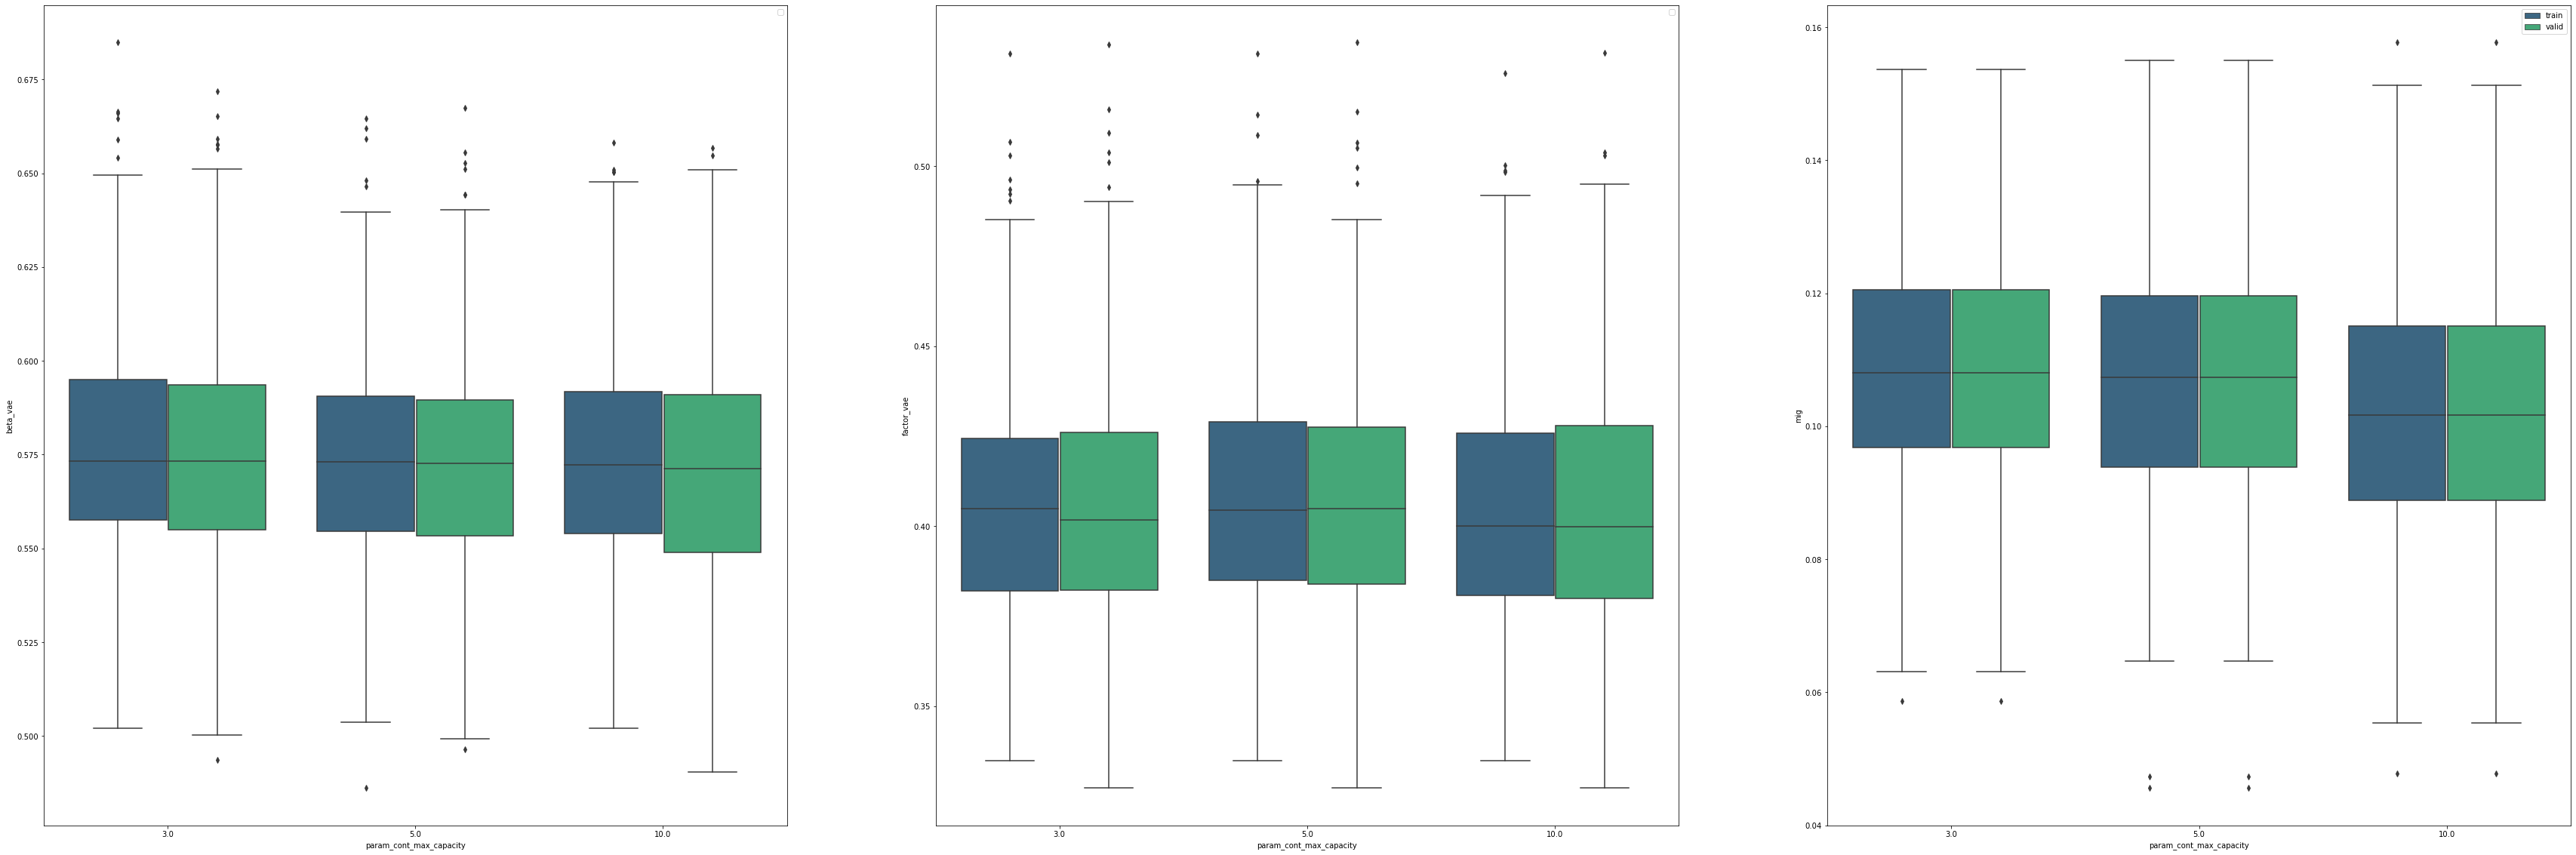

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(60, 20))
sns.boxplot(data=df1, x='param_cont_max_capacity', y='beta_vae', hue='split', palette='viridis', ax=axs[0])
sns.boxplot(data=df1, x='param_cont_max_capacity', y='factor_vae', hue='split', palette='viridis', ax=axs[1])
sns.boxplot(data=df1, x='param_cont_max_capacity', y='mig', hue='split', palette='viridis', ax=axs[2])
axs[0].legend([])
axs[1].legend([])
plt.legend(loc='upper right')

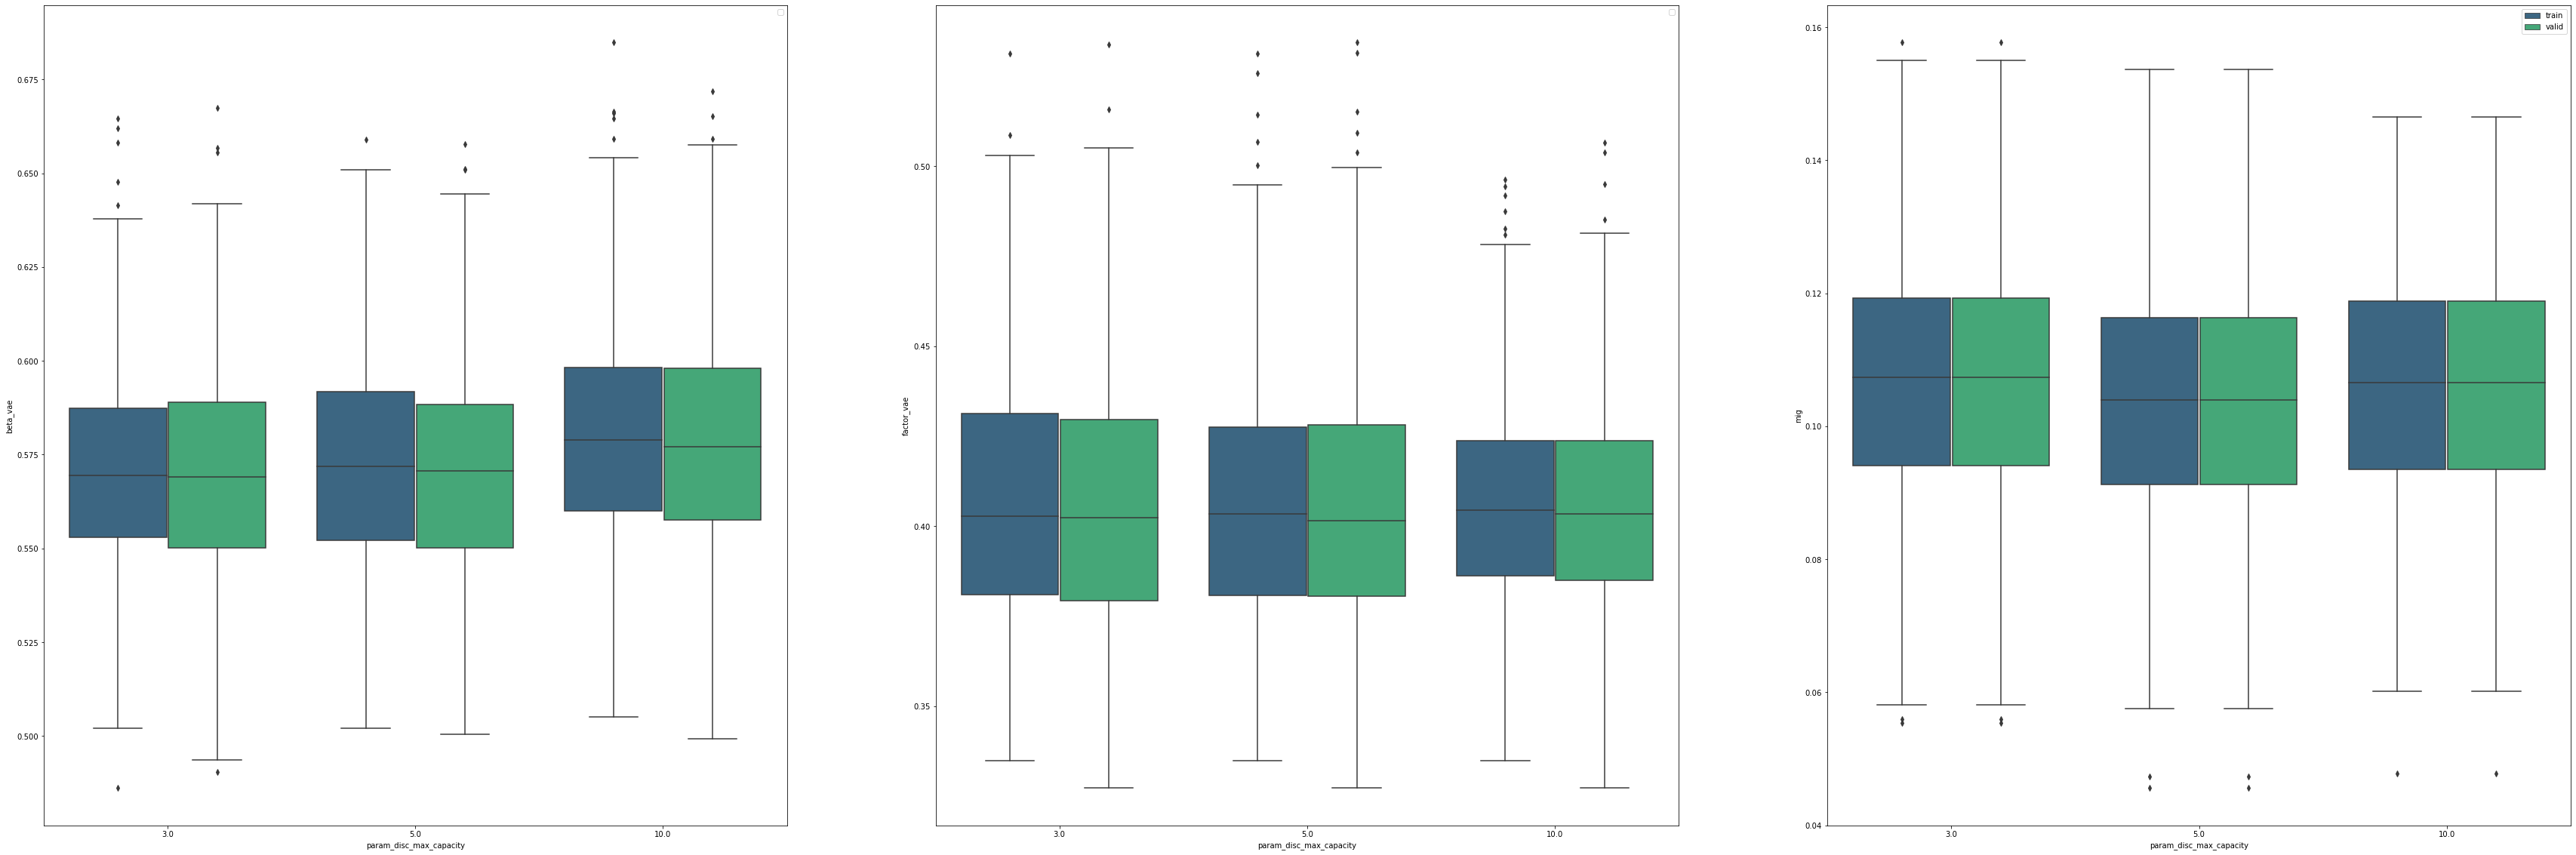

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(60, 20))
sns.boxplot(data=df1, x='param_disc_max_capacity', y='beta_vae', hue='split', palette='viridis', ax=axs[0])
sns.boxplot(data=df1, x='param_disc_max_capacity', y='factor_vae', hue='split', palette='viridis', ax=axs[1])
sns.boxplot(data=df1, x='param_disc_max_capacity', y='mig', hue='split', palette='viridis', ax=axs[2])
axs[0].legend([])
axs[1].legend([])
plt.legend(loc='upper right')

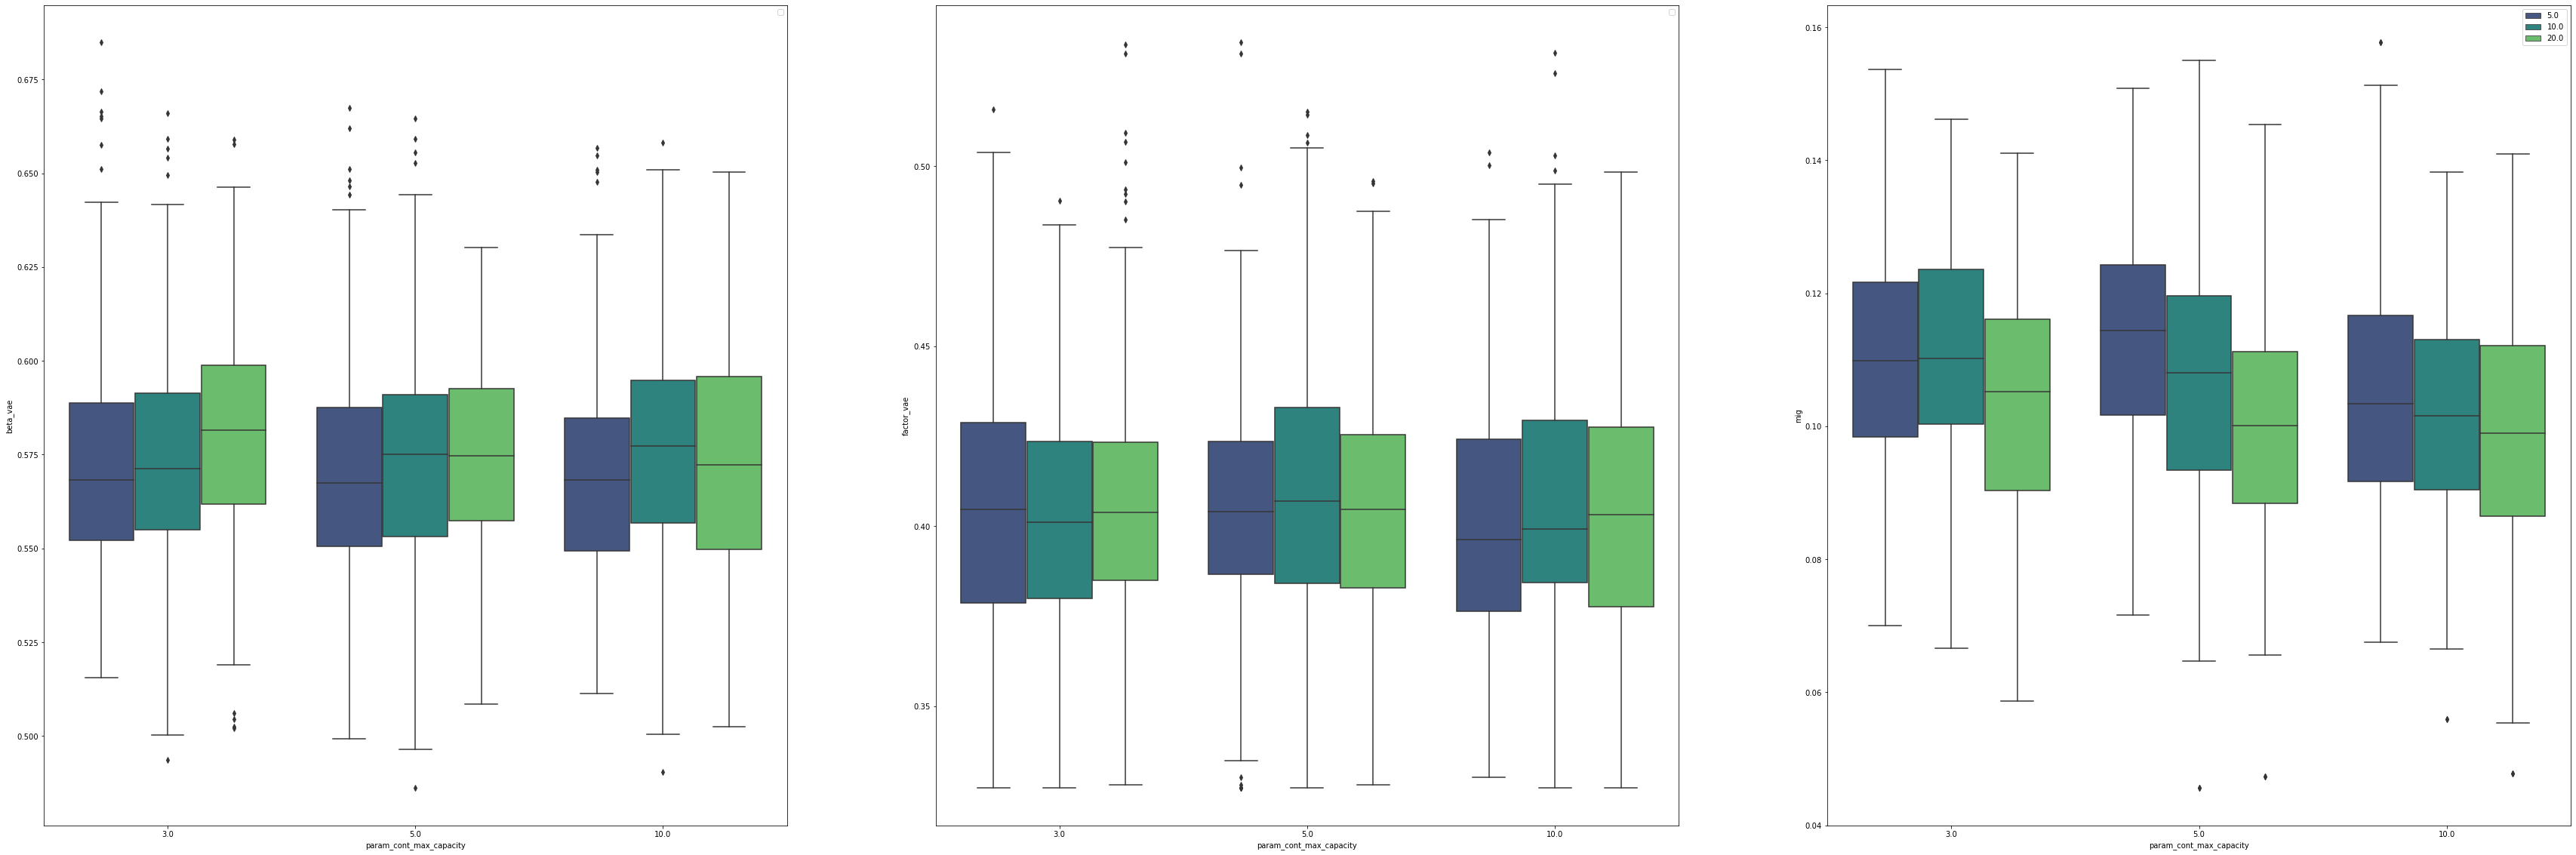

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(60, 20))
sns.boxplot(data=df1, x='param_cont_max_capacity', y='beta_vae', hue='param_cont_gamma', palette='viridis', ax=axs[0])
sns.boxplot(data=df1, x='param_cont_max_capacity', y='factor_vae', hue='param_cont_gamma', palette='viridis', ax=axs[1])
sns.boxplot(data=df1, x='param_cont_max_capacity', y='mig', hue='param_cont_gamma', palette='viridis', ax=axs[2])
axs[0].legend([])
axs[1].legend([])
plt.legend(loc='upper right')

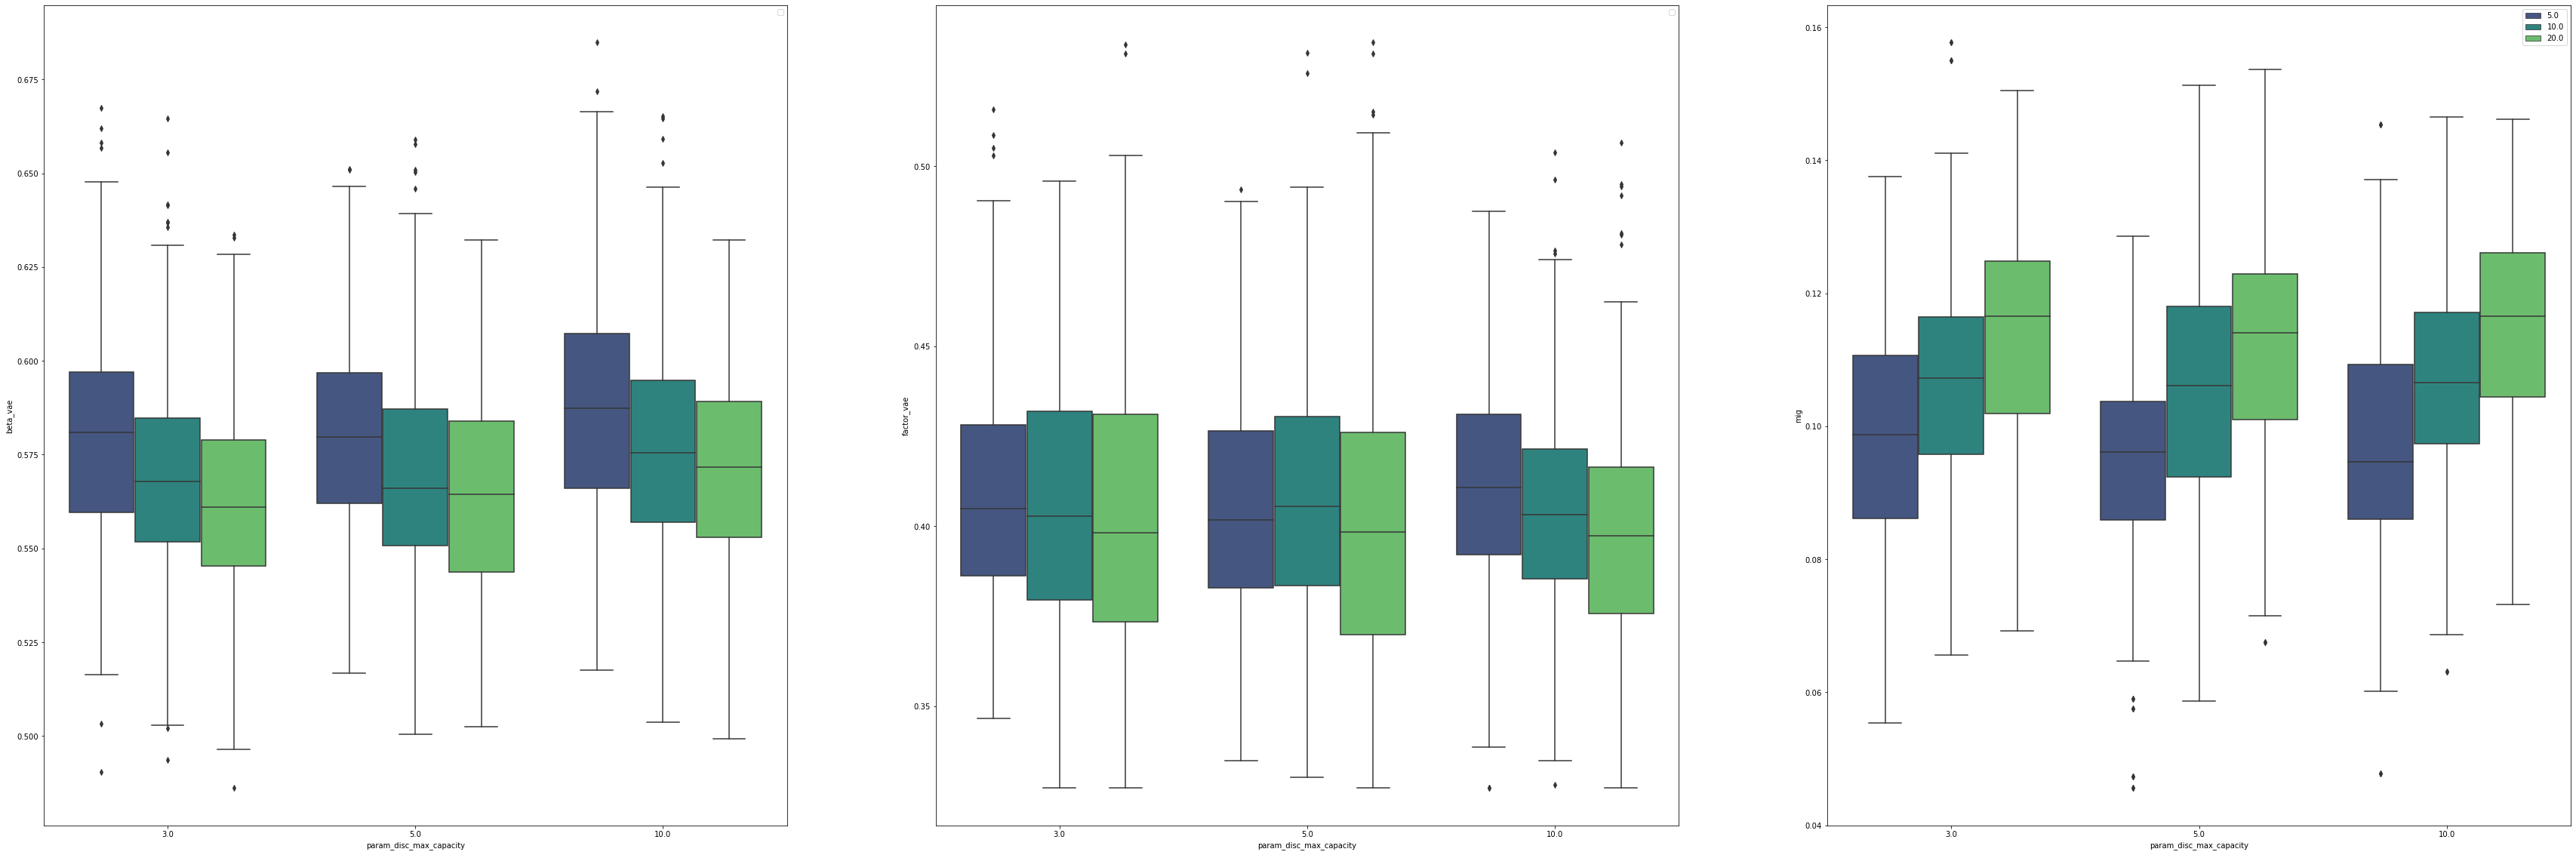

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(60, 20))
sns.boxplot(data=df1, x='param_disc_max_capacity', y='beta_vae', hue='param_disc_gamma', palette='viridis', ax=axs[0])
sns.boxplot(data=df1, x='param_disc_max_capacity', y='factor_vae', hue='param_disc_gamma', palette='viridis', ax=axs[1])
sns.boxplot(data=df1, x='param_disc_max_capacity', y='mig', hue='param_disc_gamma', palette='viridis', ax=axs[2])
axs[0].legend([])
axs[1].legend([])
plt.legend(loc='upper right')

<AxesSubplot:xlabel='param_cont_max_capacity', ylabel='mig'>

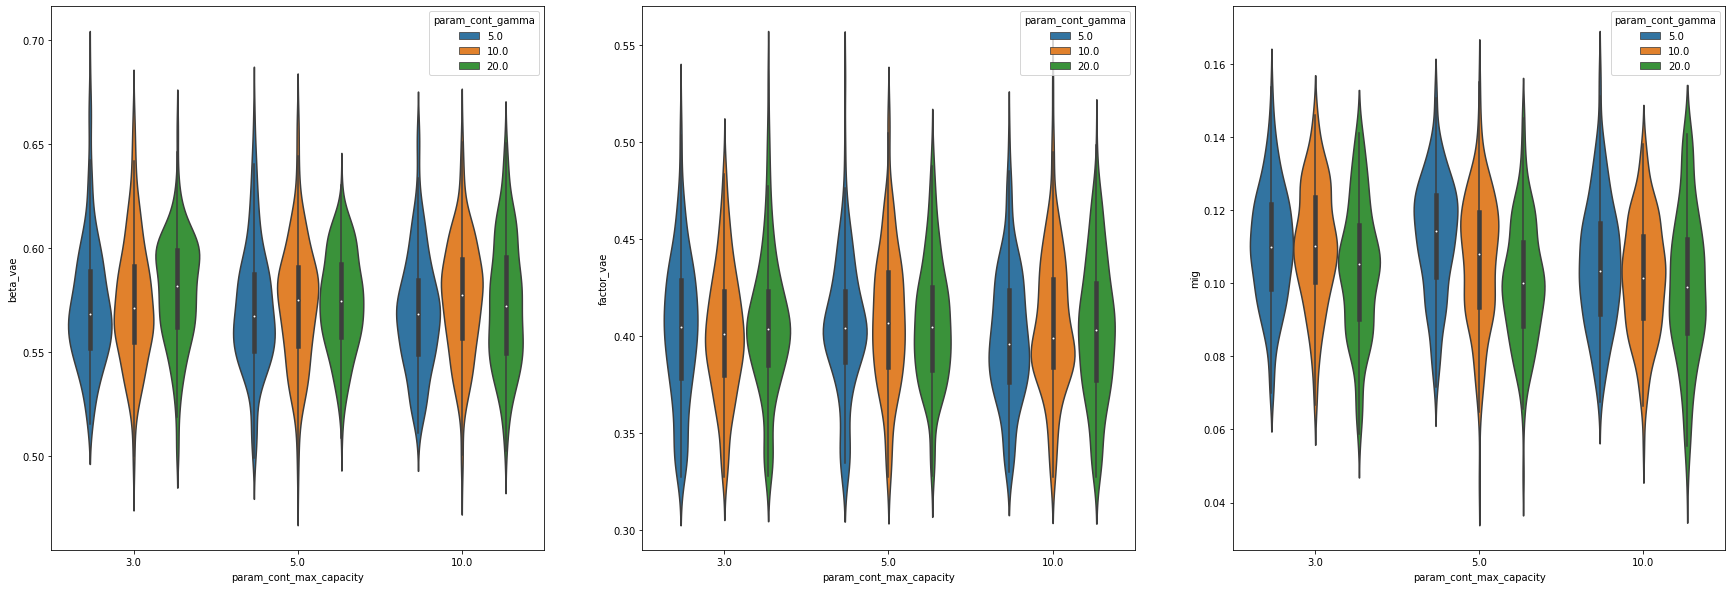

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
m = ['BetaVAE', 'FactorVAE', 'MIG']
sns.violinplot(data=df1, x='param_cont_max_capacity', y='beta_vae', hue='param_cont_gamma', ax=axs[0])
sns.violinplot(data=df1, x='param_cont_max_capacity', y='factor_vae', hue='param_cont_gamma', ax=axs[1])
sns.violinplot(data=df1, x='param_cont_max_capacity', y='mig', hue='param_cont_gamma', ax=axs[2])

<AxesSubplot:xlabel='param_disc_max_capacity', ylabel='mig'>

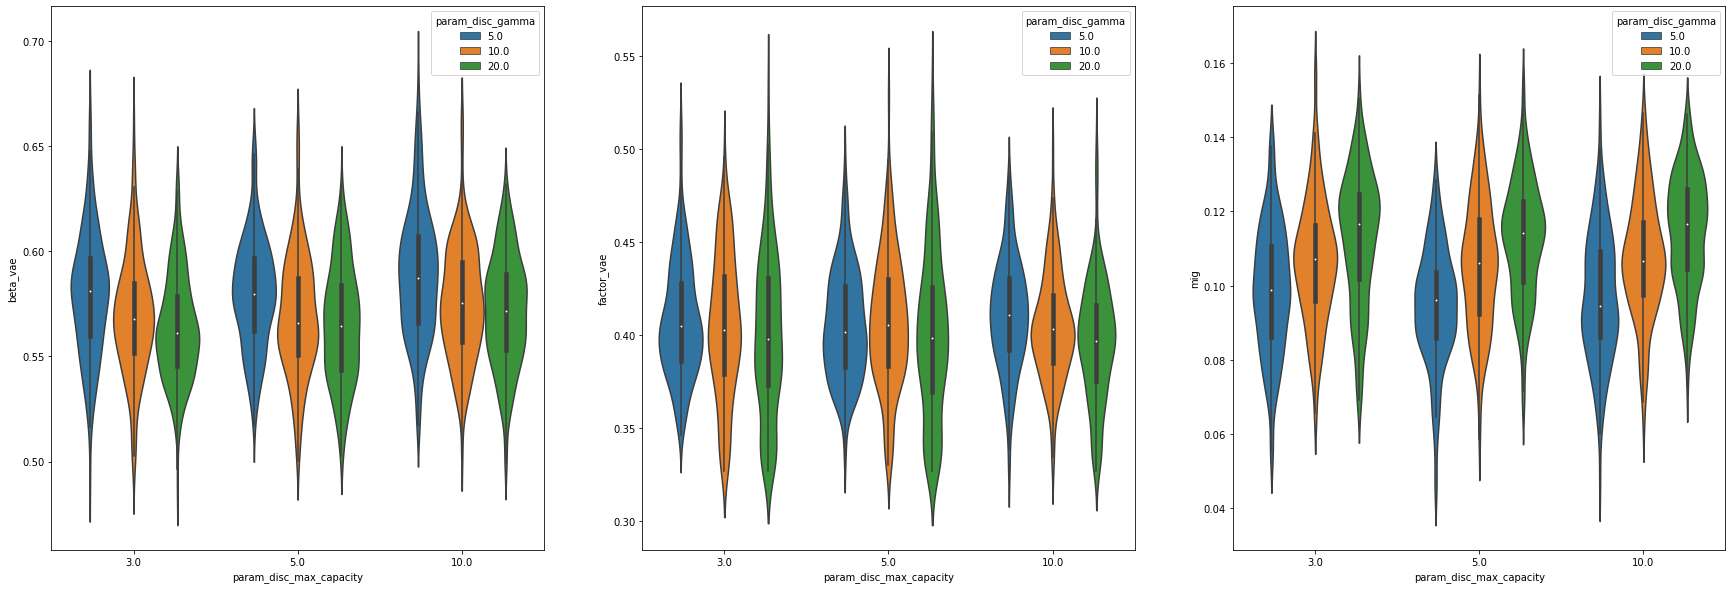

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
m = ['BetaVAE', 'FactorVAE', 'MIG']
sns.violinplot(data=df1, x='param_disc_max_capacity', y='beta_vae', hue='param_disc_gamma', ax=axs[0])
sns.violinplot(data=df1, x='param_disc_max_capacity', y='factor_vae', hue='param_disc_gamma', ax=axs[1])
sns.violinplot(data=df1, x='param_disc_max_capacity', y='mig', hue='param_disc_gamma', ax=axs[2])

<AxesSubplot:xlabel='param_cont_max_capacity', ylabel='mig'>

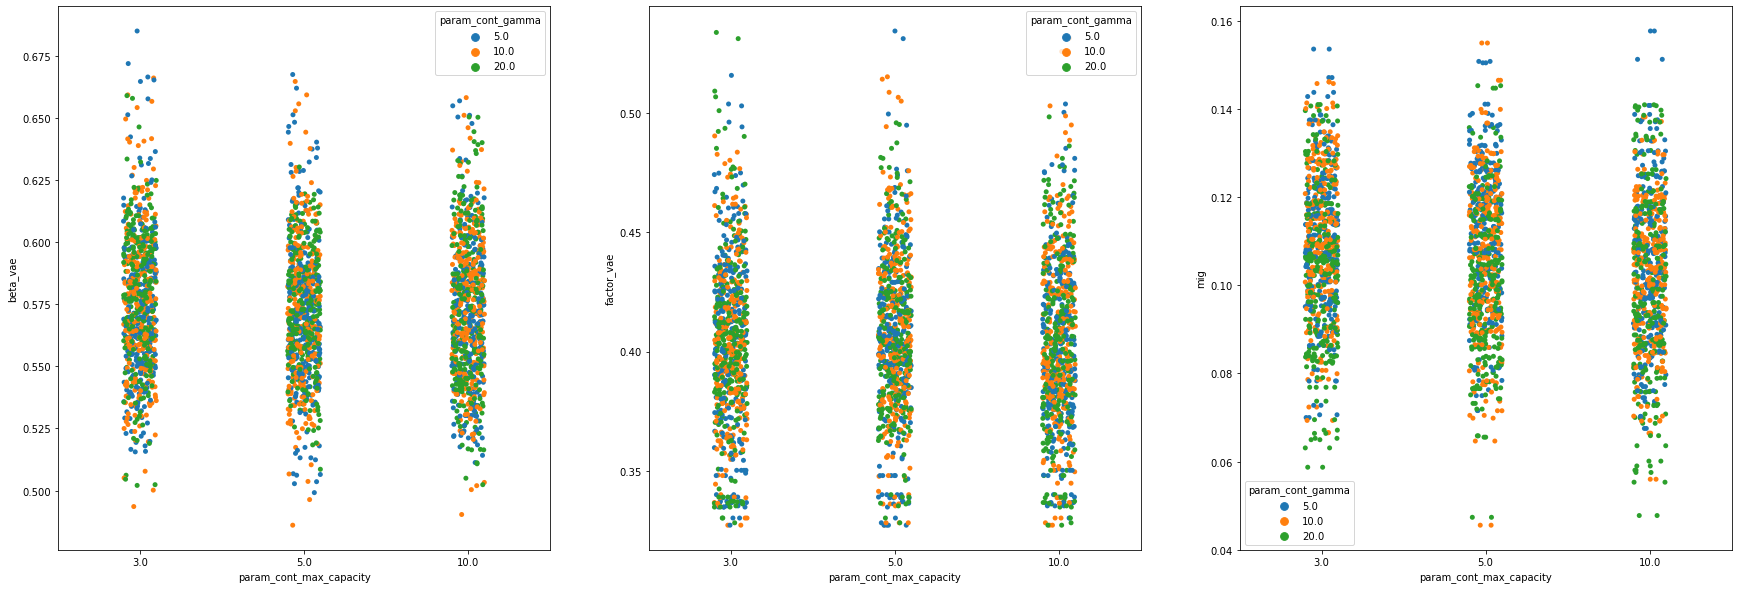

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
m = ['BetaVAE', 'FactorVAE', 'MIG']
sns.stripplot(data=df1, x='param_cont_max_capacity', y='beta_vae', hue='param_cont_gamma', ax=axs[0])
sns.stripplot(data=df1, x='param_cont_max_capacity', y='factor_vae', hue='param_cont_gamma', ax=axs[1])
sns.stripplot(data=df1, x='param_cont_max_capacity', y='mig', hue='param_cont_gamma', ax=axs[2])

<AxesSubplot:xlabel='param_disc_max_capacity', ylabel='mig'>

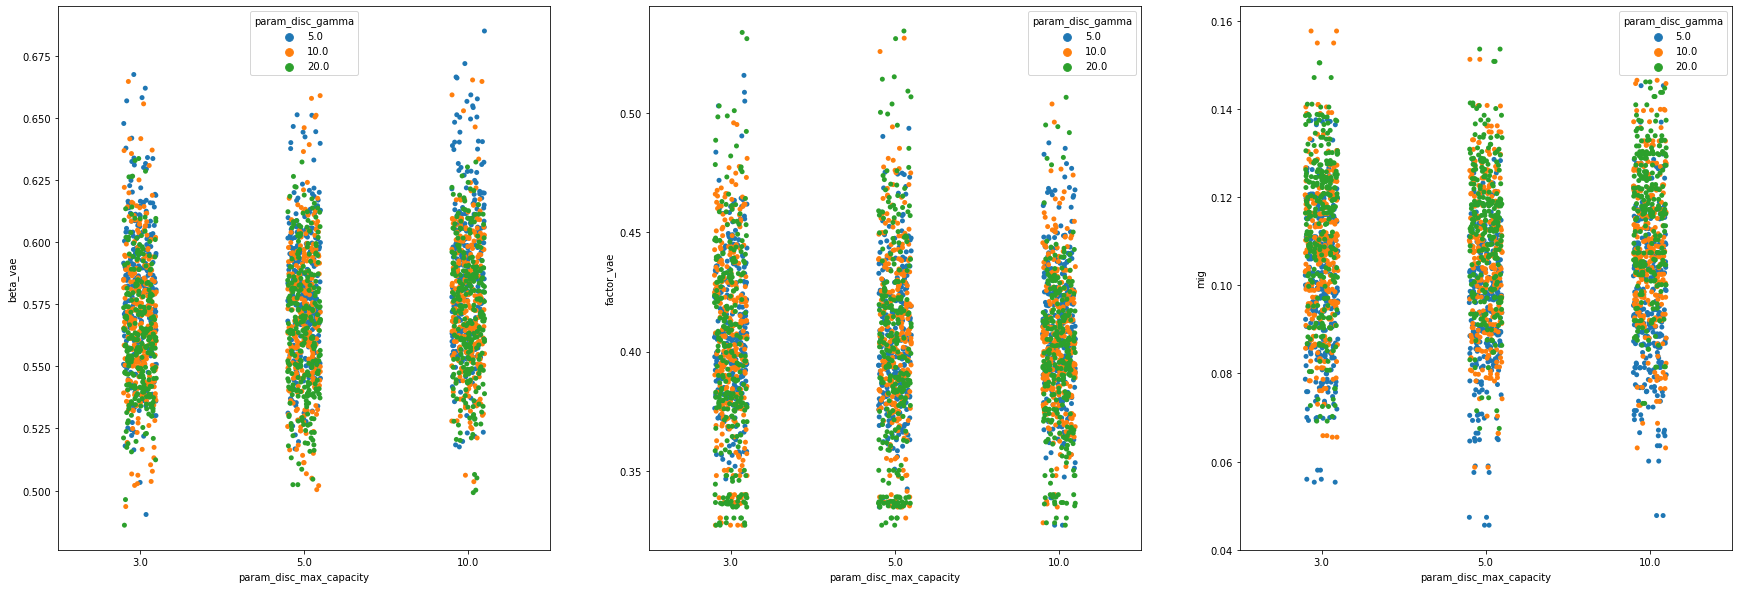

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
m = ['BetaVAE', 'FactorVAE', 'MIG']
sns.stripplot(data=df1, x='param_disc_max_capacity', y='beta_vae', hue='param_disc_gamma', ax=axs[0])
sns.stripplot(data=df1, x='param_disc_max_capacity', y='factor_vae', hue='param_disc_gamma', ax=axs[1])
sns.stripplot(data=df1, x='param_disc_max_capacity', y='mig', hue='param_disc_gamma', ax=axs[2])

### Disentanglement scores rank correlation per permutation

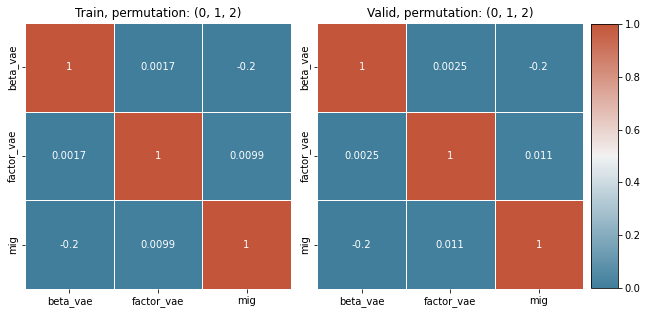

In [75]:
import scipy.stats
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for perm in [tuple(indices)]:
    dfp_train = df1[df1['permutation'].isin([str(perm)]) & df1['split'].isin(['train'])][['beta_vae', 'factor_vae', 'mig']]
    dfp_valid = df1[df1['permutation'].isin([str(perm)]) & df1['split'].isin(['valid'])][['beta_vae', 'factor_vae', 'mig']]
    c1, p1 = scipy.stats.spearmanr(dfp_train)
    c2, p2 = scipy.stats.spearmanr(dfp_valid)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].set_title('Train, permutation: ' + str(perm))
    axs[1].set_title('Valid, permutation: ' + str(perm))
    sns.heatmap(c1, cmap=cmap, square=True, ax=axs[0], vmin=0.0, vmax=1.0, annot=True, linewidths=.5, center=0.5,
        xticklabels=['beta_vae', 'factor_vae', 'mig'], yticklabels=['beta_vae', 'factor_vae', 'mig'], cbar=False)
    sns.heatmap(c2, cmap=cmap, square=True, ax=axs[1], vmin=0.0, vmax=1.0, annot=True, linewidths=.5, center=0.5,
        xticklabels=['beta_vae', 'factor_vae', 'mig'], yticklabels=['beta_vae', 'factor_vae', 'mig'], cbar=False)
    fig.colorbar(axs[0].get_children()[0], ax=axs.ravel().tolist(), aspect=10., anchor=(1.6, 0.5), shrink=0.97)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


### Pairwise scatter plot for different disentanglement metrics

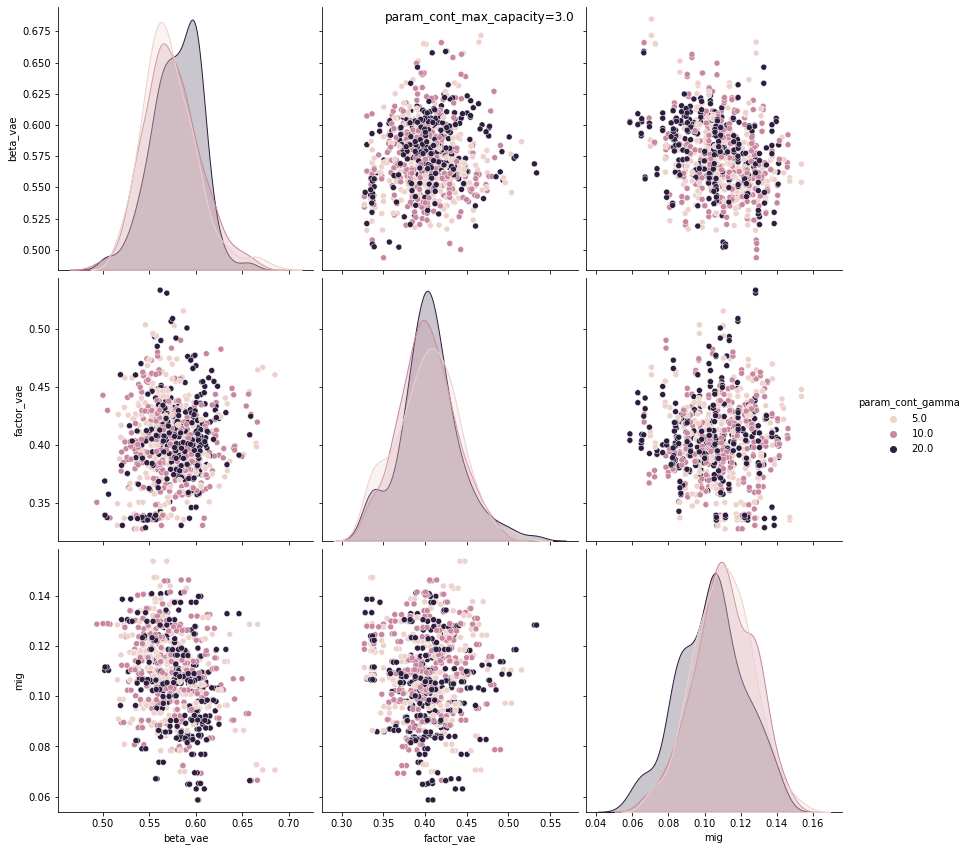

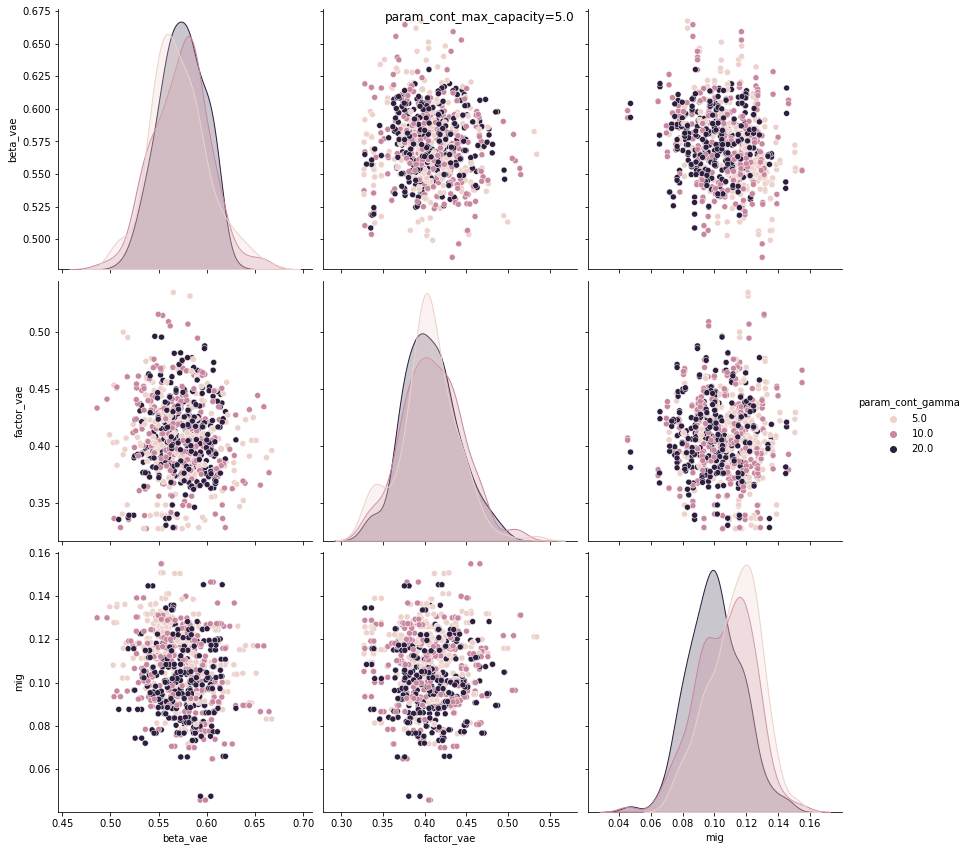

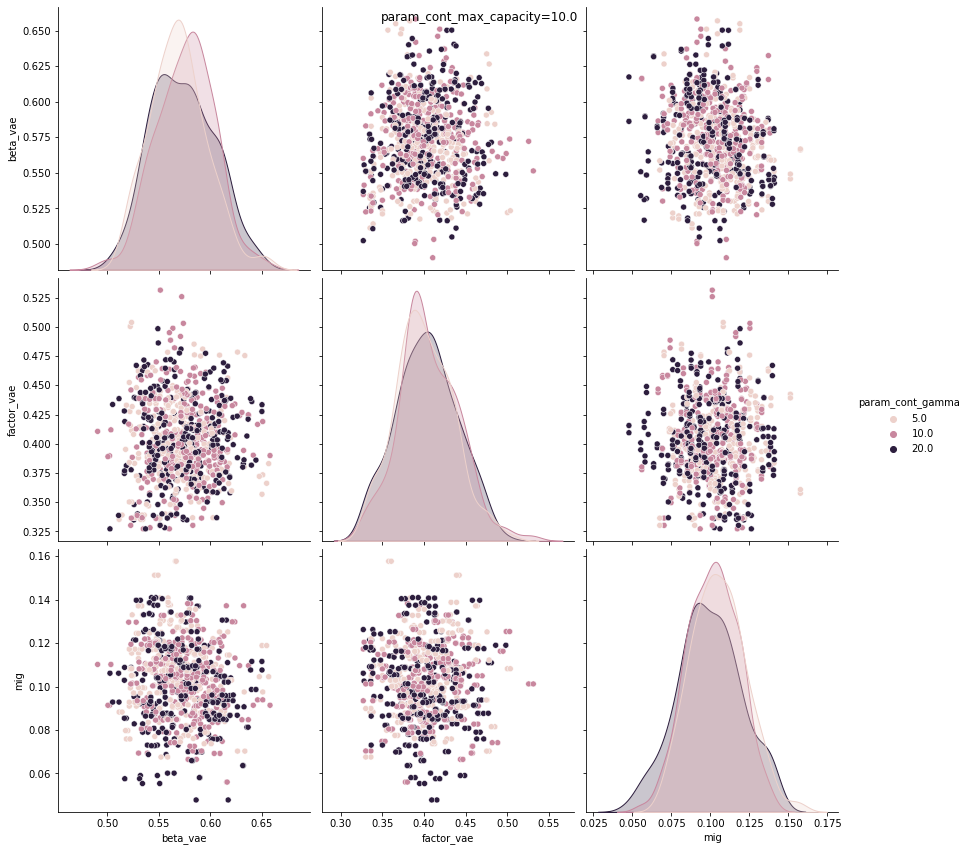

In [80]:
for n_peaks in df1['param_cont_max_capacity'].unique():
    g = sns.pairplot(df1[df1['param_cont_max_capacity'] == n_peaks][['beta_vae', 'factor_vae', 'mig', 'param_cont_gamma']], hue='param_cont_gamma', height=4)
    g.fig.suptitle('param_cont_max_capacity=' + str(n_peaks))

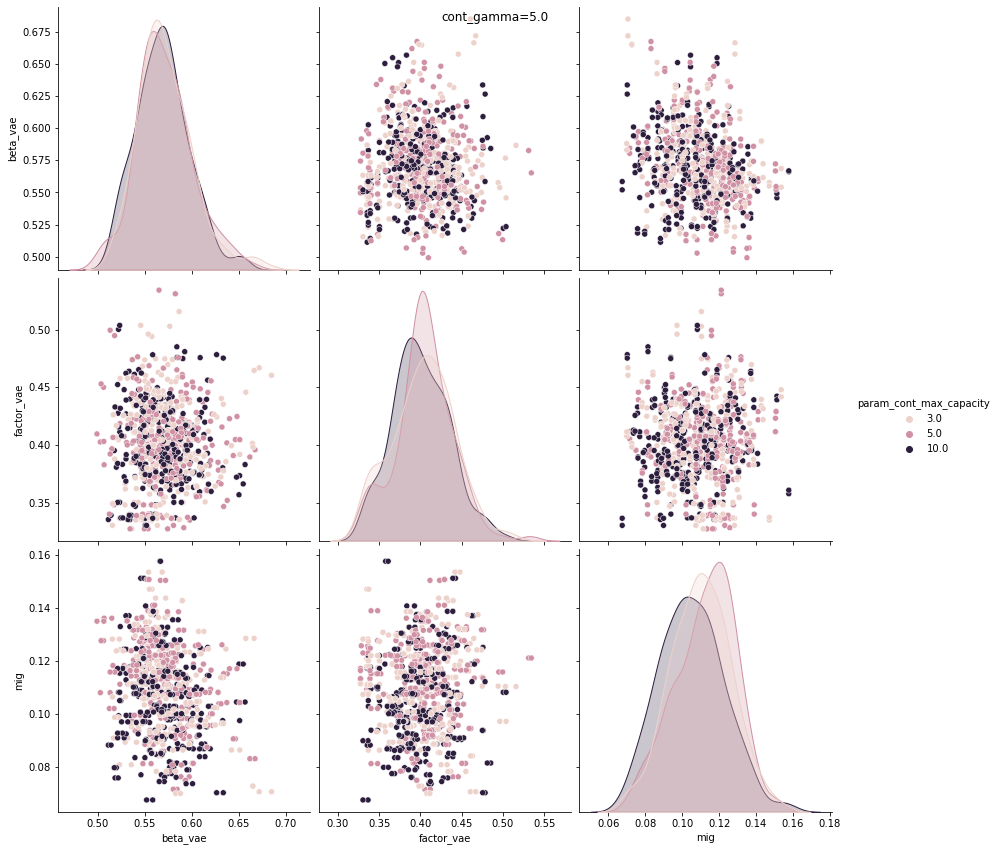

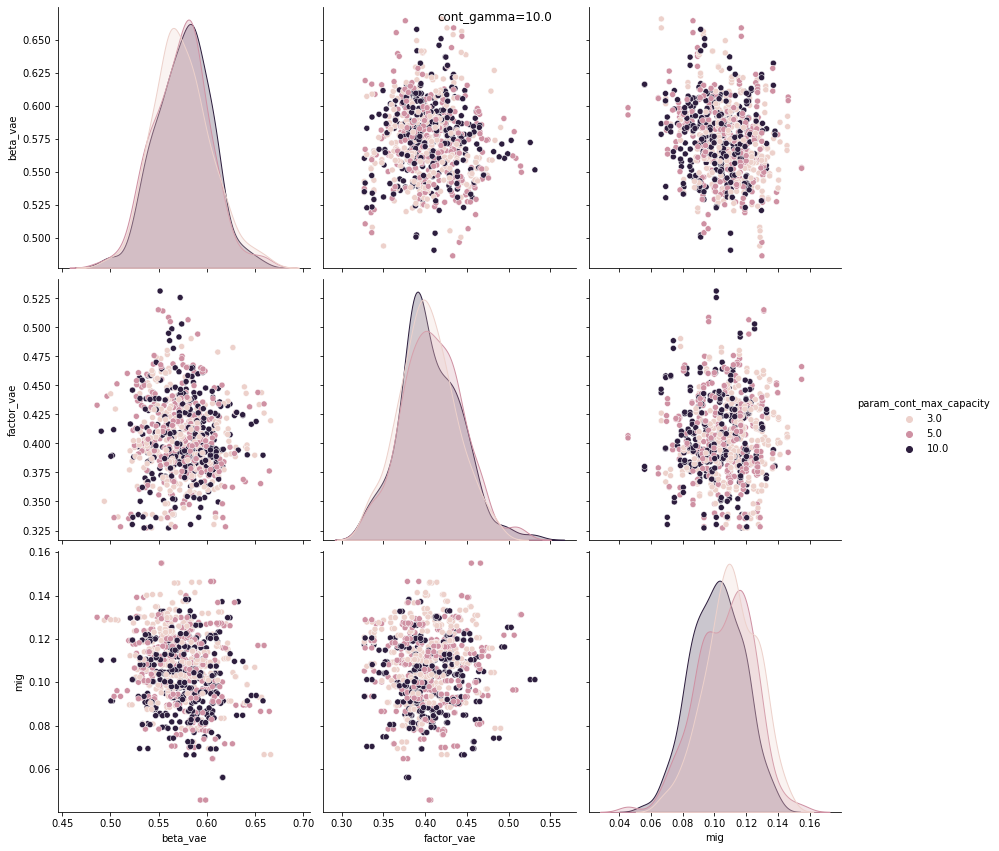

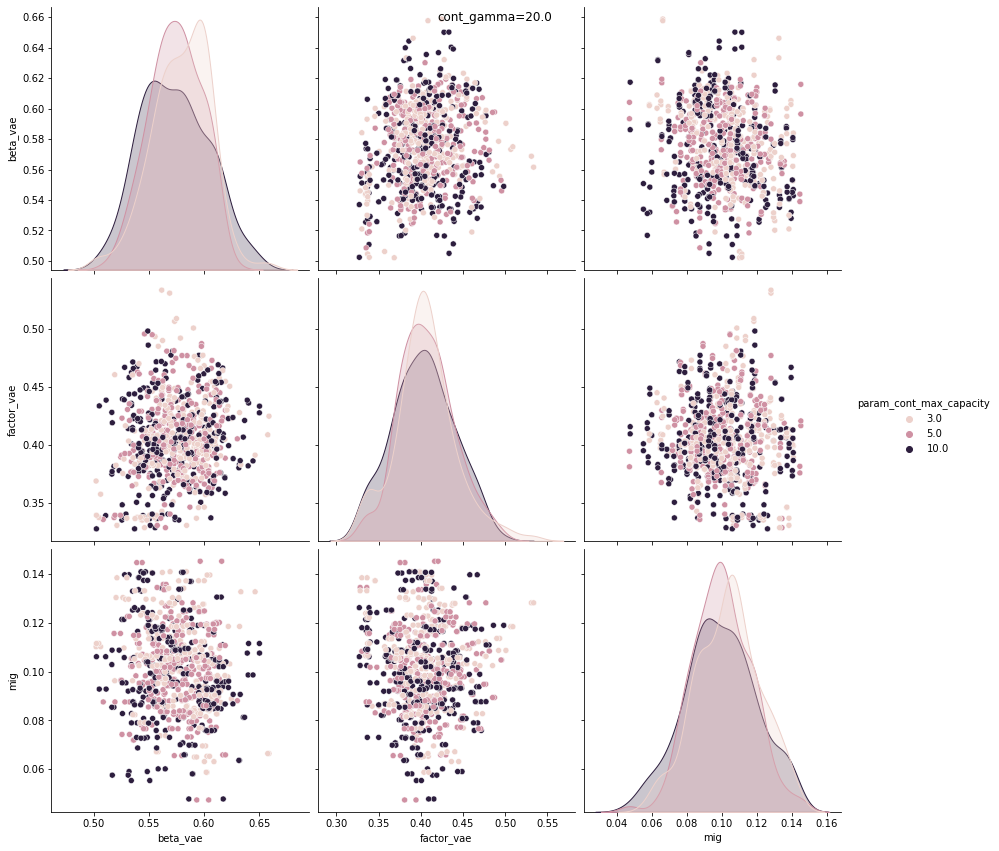

In [79]:
for beta in df1['param_cont_gamma'].unique():
    g = sns.pairplot(df1[df1['param_cont_gamma'] == beta][['beta_vae', 'factor_vae', 'mig', 'param_cont_max_capacity']], hue='param_cont_max_capacity', height=4)
    g.fig.suptitle('cont_gamma=' + str(beta))

### Variance of the disentanglement scores explained by different factors

#### Preprocess factors

In [82]:
# Assign categorical id to continuous variable: param_cont_max_capacity
param_cont_max_capacity_unique = df1['param_cont_max_capacity'].unique()
param_cont_max_capacity_map = dict(zip(param_cont_max_capacity_unique, range(len(param_cont_max_capacity_unique))))
df1['param_cont_max_capacity_id'] = df1.apply(lambda row: param_cont_max_capacity_map[row['param_cont_max_capacity']], axis=1)
param_cont_max_capacity_map, df1['param_cont_max_capacity_id'].unique()

({3.0: 0, 5.0: 1, 10.0: 2}, array([0, 1, 2], dtype=int64))

In [83]:
# Assign categorical id to continuous variable: param_disc_max_capacity
param_disc_max_capacity_unique = df1['param_disc_max_capacity'].unique()
param_disc_max_capacity_map = dict(zip(param_disc_max_capacity_unique, range(len(param_disc_max_capacity_unique))))
df1['param_disc_max_capacity_id'] = df1.apply(lambda row: param_disc_max_capacity_map[row['param_disc_max_capacity']], axis=1)
param_disc_max_capacity_map, df1['param_disc_max_capacity_id'].unique()

({3.0: 0, 5.0: 1, 10.0: 2}, array([0, 1, 2], dtype=int64))

In [85]:
# Assign categorical id to continuous variable: param_cont_gamma
param_cont_gamma_unique = df1['param_cont_gamma'].unique()
param_cont_gamma_map = dict(zip(param_cont_gamma_unique, range(len(param_cont_gamma_unique))))
df1['param_cont_gamma_id'] = df1.apply(lambda row: param_cont_gamma_map[row['param_cont_gamma']], axis=1)
param_cont_gamma_map, df1['param_cont_gamma_id'].unique()

({5.0: 0, 10.0: 1, 20.0: 2}, array([0, 1, 2], dtype=int64))

In [86]:
# Assign categorical id to continuous variable: param_disc_gamma
param_disc_gamma_unique = df1['param_disc_gamma'].unique()
param_disc_gamma_map = dict(zip(param_disc_gamma_unique, range(len(param_disc_gamma_unique))))
df1['param_disc_gamma_id'] = df1.apply(lambda row: param_disc_gamma_map[row['param_disc_gamma']], axis=1)
param_disc_gamma_map, df1['param_disc_gamma_id'].unique()

({5.0: 0, 10.0: 1, 20.0: 2}, array([0, 1, 2], dtype=int64))

In [87]:
# Assign categorical id to continuous variable: layer_config
def reduce_layer_config(row):
    layer_config = ast.literal_eval(row['layer_config'])
    encoder, decoder = layer_config[0][1:], layer_config[1][:-1]
    return str([encoder, decoder])

df1['arch'] = df1.apply(reduce_layer_config, axis=1)
arch_unique = df1['arch'].unique()
arch_map = dict(zip(arch_unique, range(len(arch_unique))))
df1['arch_id'] = df1.apply(lambda row: arch_map[row['arch']], axis=1)
arch_map, df1['arch_id'].unique()

({'[[100, 3], [3, 100]]': 0,
  '[[200, 3], [3, 200]]': 1,
  '[[400, 3], [3, 400]]': 2,
  '[[800, 3], [3, 800]]': 3,
  '[[1600, 3], [3, 1600]]': 4,
  '[[1600, 100, 3], [3, 100, 1600]]': 5,
  '[[800, 100, 3], [3, 100, 800]]': 6,
  '[[400, 100, 3], [3, 100, 400]]': 7,
  '[[200, 100, 3], [3, 100, 200]]': 8,
  '[[100, 90, 3], [3, 90, 100]]': 9,
  '[[1600, 200, 50, 3], [3, 50, 200, 1600]]': 10,
  '[[800, 200, 50, 3], [3, 50, 200, 800]]': 11,
  '[[400, 200, 50, 3], [3, 50, 200, 400]]': 12,
  '[[200, 100, 50, 3], [3, 50, 100, 200]]': 13,
  '[[100, 90, 50, 3], [3, 50, 90, 100]]': 14},
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int64))

#### One hot encode

In [88]:
def one_hot_encode(df, name):
    id = df[name].to_numpy()
    ids = np.unique(id)
    n_values = np.max(ids) + 1
    return np.eye(n_values)[id]

In [89]:
param_cont_max_capacity_ohe = one_hot_encode(df1, 'param_cont_max_capacity_id')
param_disc_max_capacity_ohe = one_hot_encode(df1, 'param_disc_max_capacity_id')
param_cont_gamma_ohe = one_hot_encode(df1, 'param_cont_gamma_id')
param_disc_gamma_ohe = one_hot_encode(df1, 'param_disc_gamma_id')
arch_ohe = one_hot_encode(df1, 'arch_id')
param_cont_max_capacity_ohe.shape, param_disc_max_capacity_ohe.shape, param_cont_gamma_ohe.shape, param_disc_gamma_ohe.shape, arch_ohe.shape

((2430, 3), (2430, 3), (2430, 3), (2430, 3), (2430, 15))

In [90]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm

def linear_regression(X, y):
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)

    mse = skm.mean_squared_error(y, y_pred)
    mae = skm.mean_absolute_error(y, y_pred)
    me  = skm.max_error(y, y_pred)
    evs = skm.explained_variance_score(y, y_pred)
    return mse, mae, me, evs

In [91]:
scores = []

In [92]:
score_names = ['beta_vae', 'factor_vae', 'mig']
for score_name in score_names:
    X = np.hstack((param_cont_max_capacity_ohe, param_disc_max_capacity_ohe, param_cont_gamma_ohe, param_disc_gamma_ohe, arch_ohe))
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 1, 1, 1, 1, 1])

    X = param_cont_max_capacity_ohe
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 1, 0, 0, 0, 0])

    X = param_disc_max_capacity_ohe
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 0, 1, 0, 0, 0])

    X = param_cont_gamma_ohe
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 0, 0, 1, 0, 0])

    X = param_disc_gamma_ohe
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 0, 0, 0, 1, 0])

    X = arch_ohe
    y = df1[score_name].to_numpy()
    mse, mae, me, evs = linear_regression(X, y)
    scores.append([mse, mae, me, evs, score_name, 0, 0, 0, 0, 1])

In [100]:
df_scores = pd.DataFrame(scores, columns=['MSE', 'MAE', 'ME', 'EVS', 'target_value', 'param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch'])
df_scores

MSE       MAE        ME       EVS target_value  \
0   0.000728  0.021354  0.097461  0.108061     beta_vae   
1   0.000815  0.022796  0.109790  0.001551     beta_vae   
2   0.000803  0.022594  0.106043  0.016655     beta_vae   
3   0.000812  0.022634  0.114296  0.005528     beta_vae   
4   0.000771  0.022043  0.102304  0.055463     beta_vae   
5   0.000793  0.022473  0.098474  0.029384     beta_vae   
6   0.001199  0.027363  0.135607  0.039659   factor_vae   
7   0.001246  0.027700  0.130309  0.001984   factor_vae   
8   0.001249  0.027720  0.129844  0.000012   factor_vae   
9   0.001247  0.027725  0.131969  0.001603   factor_vae   
10  0.001234  0.027610  0.135200  0.011673   factor_vae   
11  0.001215  0.027531  0.133329  0.026742   factor_vae   
12  0.000248  0.012452  0.051897  0.226035          mig   
13  0.000314  0.014284  0.060809  0.020506          mig   
14  0.000319  0.014430  0.058806  0.002888          mig   
15  0.000309  0.014179  0.060680  0.035409          mig   
16  0.000275  0.013194  0.051108  0.142721          mig   
17  0.000312  0.014215  0.058478  0.025119          mig   

    param_cont_max_capacity  param_disc_max_capacity  param_cont_gamma  \
0                         1                        1                 1   
1                         1                        0                 0   
2                         0                        1                 0   
3                         0                        0                 1   
4                         0                        0                 0   
5                         0                        0                 0   
6                         1                        1                 1   
7                         1                        0                 0   
8                         0                        1                 0   
9                         0                        0                 1   
10                        0                        0                 0   
11                        0                        0                 0   
12                        1                        1                 1   
13                        1                        0                 0   
14                        0                        1                 0   
15                        0                        0                 1   
16                        0                        0                 0   
17                        0                        0                 0   

    param_disc_gamma  arch  
0                  1     1  
1                  0     0  
2                  0     0  
3                  0     0  
4                  1     0  
5                  0     1  
6                  1     1  
7                  0     0  
8                  0     0  
9                  0     0  
10                 1     0  
11                 0     1  
12                 1     1  
13                 0     0  
14                 0     0  
15                 0     0  
16                 1     0  
17                 0     1

In [101]:
index = df_scores[df_scores['target_value'] == 'beta_vae'].copy()[['param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch']]
beta_vae_score = df_scores[df_scores['target_value'] == 'beta_vae'].copy()[['MSE', 'MAE', 'ME', 'EVS']]
factor_vae_score = df_scores[df_scores['target_value'] == 'factor_vae'].copy()[['MSE', 'MAE', 'ME', 'EVS']]
factor_vae_score.index = beta_vae_score.index
mig_score = df_scores[df_scores['target_value'] == 'mig'].copy()[['MSE', 'MAE', 'ME', 'EVS']]
mig_score.index = factor_vae_score.index
df_scores_ = pd.concat([beta_vae_score, factor_vae_score, mig_score], axis=1, ignore_index=True)
df_scores_= df_scores_.rename(columns={
    0: "beta_vae_MSE", 1: "beta_vae_MAE", 2: 'beta_vae_ME', 3: 'beta_vae_EVS',
    4: "factor_vae_MSE", 5: "factor_vae_MAE", 6: 'factor_vae_ME', 7: 'factor_vae_EVS',
    8: "mig_MSE", 9: "mig_MAE", 10: 'mig_ME', 11: 'mig_EVS'})

# for col in df_scores_.columns:
#     df_scores_[col] = df_scores_[col]
df_scores = pd.concat([df_scores_, index], axis=1)
df_scores['config'] = 'Config'
df_scores

beta_vae_MSE  beta_vae_MAE  beta_vae_ME  beta_vae_EVS  factor_vae_MSE  \
0      0.000728      0.021354     0.097461      0.108061        0.001199   
1      0.000815      0.022796     0.109790      0.001551        0.001246   
2      0.000803      0.022594     0.106043      0.016655        0.001249   
3      0.000812      0.022634     0.114296      0.005528        0.001247   
4      0.000771      0.022043     0.102304      0.055463        0.001234   
5      0.000793      0.022473     0.098474      0.029384        0.001215   

   factor_vae_MAE  factor_vae_ME  factor_vae_EVS   mig_MSE   mig_MAE  \
0        0.027363       0.135607        0.039659  0.000248  0.012452   
1        0.027700       0.130309        0.001984  0.000314  0.014284   
2        0.027720       0.129844        0.000012  0.000319  0.014430   
3        0.027725       0.131969        0.001603  0.000309  0.014179   
4        0.027610       0.135200        0.011673  0.000275  0.013194   
5        0.027531       0.133329        0.026742  0.000312  0.014215   

     mig_ME   mig_EVS  param_cont_max_capacity  param_disc_max_capacity  \
0  0.051897  0.226035                        1                        1   
1  0.060809  0.020506                        1                        0   
2  0.058806  0.002888                        0                        1   
3  0.060680  0.035409                        0                        0   
4  0.051108  0.142721                        0                        0   
5  0.058478  0.025119                        0                        0   

   param_cont_gamma  param_disc_gamma  arch  config  
0                 1                 1     1  Config  
1                 0                 0     0  Config  
2                 0                 0     0  Config  
3                 1                 0     0  Config  
4                 0                 1     0  Config  
5                 0                 0     1  Config

In [ ]:
# fig, axs = plt.subplots(figsize=(15, 15))
# axs.scatter(y, y_pred)
# axs.plot([np.min(y) - 0.01, np.max(y) + 0.01], [np.min(y_pred) - 0.01, np.max(y_pred) + 0.01], linestyle='dashed', color='red')

In [96]:
from specvae.visualize import multi_index_heatmap

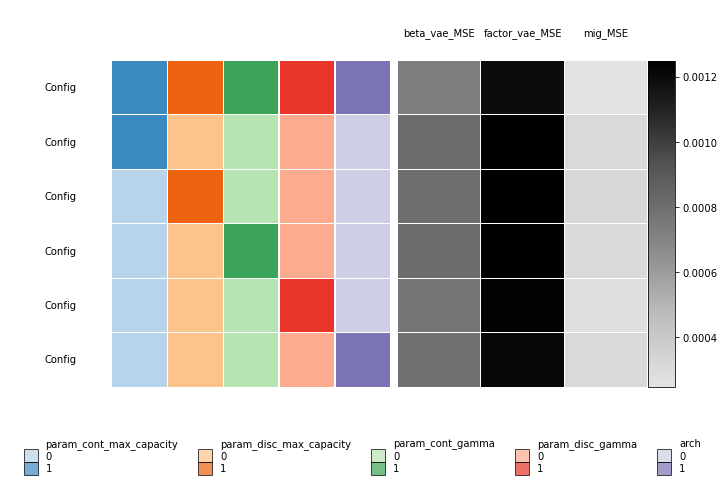

In [102]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch'], 
    sample_columns=['beta_vae_MSE', 'factor_vae_MSE', 'mig_MSE'])

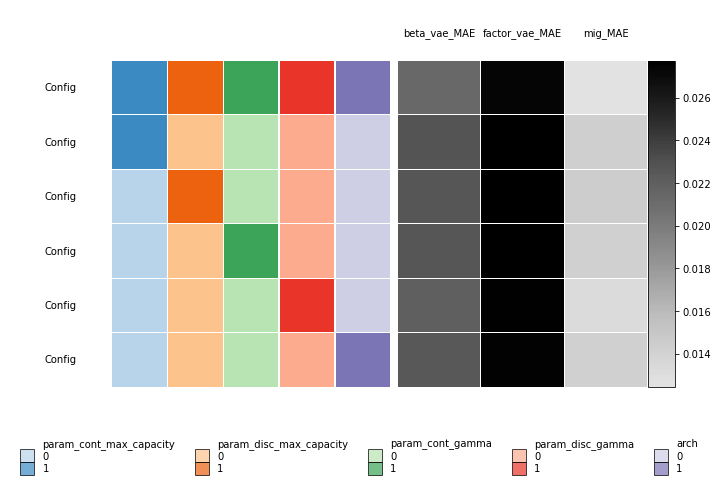

In [103]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch'], 
    sample_columns=['beta_vae_MAE', 'factor_vae_MAE', 'mig_MAE'])

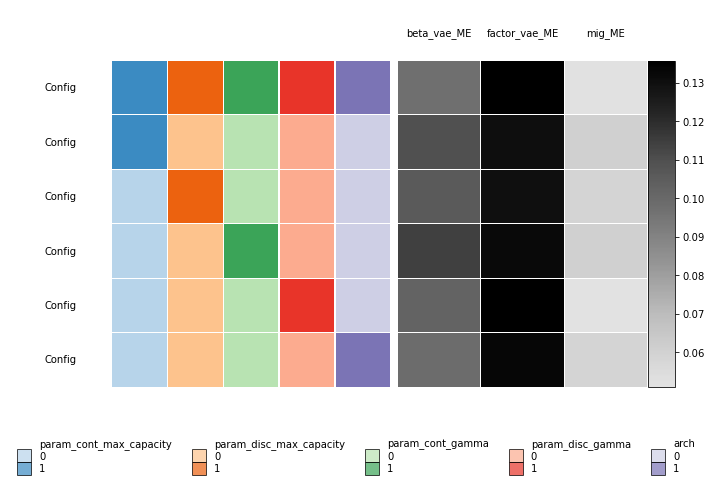

In [104]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch'], 
    sample_columns=['beta_vae_ME', 'factor_vae_ME', 'mig_ME'])

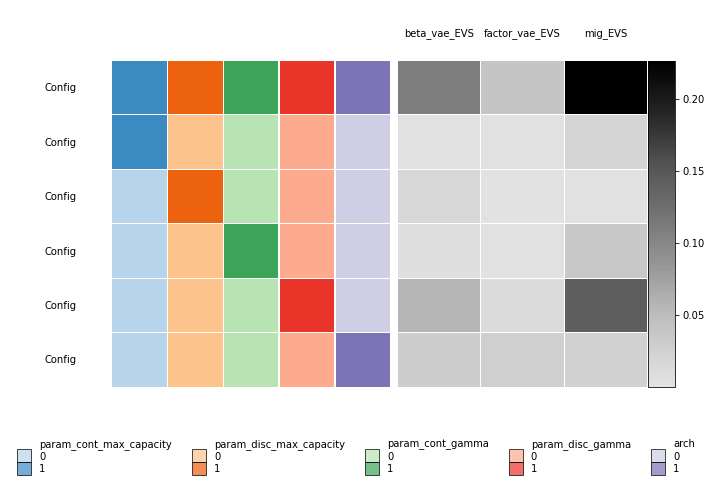

In [105]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_cont_max_capacity', 'param_disc_max_capacity', 'param_cont_gamma', 'param_disc_gamma', 'arch'], 
    sample_columns=['beta_vae_EVS', 'factor_vae_EVS', 'mig_EVS'])